In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from patsy import dmatrices

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
import matplotlib.ticker as ticker
import graphviz
from graphviz import Source
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

import graphviz
from graphviz import Source

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data understanding and prep

# (1).Merge 2 files into a new file and clean it

Merge

In [2]:
df1=pd.read_csv('covid19-cdc-20211294.csv')
df2=pd.read_csv('covid19-cdc-22200549.csv')

merged_df = pd.concat([df1, df2], ignore_index=True)
merged_df.to_csv('merged_file.csv', index=False)

# (2) Clean the dataset

change the type of columns

In [3]:
df=pd.read_csv('merged_file.csv')
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-08,OR,41.0,JOSEPHINE,41033.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,0.0,Laboratory reported,Missing,Laboratory-confirmed case,Symptomatic,Yes,No,Yes,NaN
1,2020-12,CA,6.0,LOS ANGELES,6037.0,65+ years,Female,Black,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,NaN
2,2021-02,PA,42.0,ALLEGHENY,42003.0,65+ years,Male,White,Non-Hispanic/Latino,4.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Yes,NaN
3,2020-04,NY,36.0,WESTCHESTER,36119.0,65+ years,Female,Missing,Unknown,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
4,2020-12,NV,32.0,CLARK,32003.0,65+ years,Female,Black,Non-Hispanic/Latino,0.0,NaN,Routine surveillance,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Yes


In [4]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

Drop 2 continuous columns as they have little impact on final outcome

In [5]:
df=df.drop('case_positive_specimen_interval', axis=1)
df=df.drop('case_onset_interval', axis=1)
df

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-08,OR,41.0,JOSEPHINE,41033.0,65+ years,Male,White,Non-Hispanic/Latino,Laboratory reported,Missing,Laboratory-confirmed case,Symptomatic,Yes,No,Yes,NaN
1,2020-12,CA,6.0,LOS ANGELES,6037.0,65+ years,Female,Black,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,NaN
2,2021-02,PA,42.0,ALLEGHENY,42003.0,65+ years,Male,White,Non-Hispanic/Latino,Missing,Yes,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Yes,NaN
3,2020-04,NY,36.0,WESTCHESTER,36119.0,65+ years,Female,Missing,Unknown,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
4,2020-12,NV,32.0,CLARK,32003.0,65+ years,Female,Black,Non-Hispanic/Latino,Routine surveillance,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2022-10,NY,36.0,ONONDAGA,36067.0,50 to 64 years,Male,Black,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
39996,2021-08,FL,12.0,BROWARD,12011.0,18 to 49 years,Female,White,Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
39997,2021-11,MI,26.0,KENT,26081.0,0 - 17 years,Male,White,Non-Hispanic/Latino,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
39998,2020-05,MS,28.0,JONES,28067.0,18 to 49 years,Male,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


drop 'res_state' as it duplicate with 'county_fips_code',drop 'sypmtom_status','process' and 'exposure_yn' column

In [6]:
df=df.drop('res_county',axis=1)
df=df.drop('process',axis=1)
df=df.drop('exposure_yn',axis=1)
df=df.drop('symptom_status',axis=1)
df=df.drop('res_state',axis=1)
df

,case_month,state_fips_code,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-08,41.0,41033.0,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,No,Yes,NaN
1,2020-12,6.0,6037.0,65+ years,Female,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Unknown,Yes,NaN
2,2021-02,42.0,42003.0,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Unknown,Yes,NaN
3,2020-04,36.0,36119.0,65+ years,Female,Missing,Unknown,Laboratory-confirmed case,Missing,Missing,Yes,NaN
4,2020-12,32.0,32003.0,65+ years,Female,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Missing,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2022-10,36.0,36067.0,50 to 64 years,Male,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,No,NaN
39996,2021-08,12.0,12011.0,18 to 49 years,Female,White,Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,No,NaN
39997,2021-11,26.0,26081.0,0 - 17 years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,Missing,No,NaN
39998,2020-05,28.0,28067.0,18 to 49 years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,Missing,No,NaN


replace null and 'unknown' value with 'Missing' in 'county_fips_code','age_group','sex', 'race','ethnicity', 'hosp_yn', 'icu_yn'and 'underlying_conditions_yn' column

In [7]:
convert_column=['county_fips_code','age_group','sex','race','ethnicity','hosp_yn','icu_yn','underlying_conditions_yn']
for i in convert_column:
    df[i].fillna(value='Missing', inplace=True)
    df[i]=df[i].replace('Unknown','Missing')
    check_null=df[i].isnull().sum()
    check_unknown=df[i][df[i].isin(['Unknown'])]
    print('null value in ',i,'column is: ',check_null)
    print('unknown value in ',i,'column is: ',check_unknown.count())


null value in  county_fips_code column is:  0
unknown value in  county_fips_code column is:  0
null value in  age_group column is:  0
unknown value in  age_group column is:  0
null value in  sex column is:  0
unknown value in  sex column is:  0
null value in  race column is:  0
unknown value in  race column is:  0
null value in  ethnicity column is:  0
unknown value in  ethnicity column is:  0
null value in  hosp_yn column is:  0
unknown value in  hosp_yn column is:  0
null value in  icu_yn column is:  0
unknown value in  icu_yn column is:  0
null value in  underlying_conditions_yn column is:  0
unknown value in  underlying_conditions_yn column is:  0


In [8]:
# Select columns containing categorical data
categorical_columns = df[['case_month','state_fips_code','county_fips_code','age_group','sex','race','ethnicity','current_status','hosp_yn','icu_yn','death_yn','underlying_conditions_yn']].columns
# the features above were chosen as categories because 
# can take on a limited and unordered set of values or categories

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')  

category_columns = df.select_dtypes(['category']).columns
all_columns = df.columns

# check data type after conversion
df.dtypes

case_month                  category
state_fips_code             category
county_fips_code            category
age_group                   category
sex                         category
race                        category
ethnicity                   category
current_status              category
hosp_yn                     category
icu_yn                      category
death_yn                    category
underlying_conditions_yn    category
dtype: object

check duplicate rows and drop them

In [9]:
# check duplicate rows and drop them
df.duplicated().sum()

5544

In [10]:
df = df.drop_duplicates()
df.duplicated().sum()

0

check constant columns

In [11]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
case_month,34456,35,2022-01,4169
state_fips_code,34455.0,49.0,36.0,3386.0
county_fips_code,34456,1334,Missing,2065
age_group,34456,5,18 to 49 years,13093
sex,34456,3,Female,17338
race,34456,7,White,21368
ethnicity,34456,3,Non-Hispanic/Latino,20893
current_status,34456,2,Laboratory-confirmed case,28872
hosp_yn,34456,3,No,17606
icu_yn,34456,3,Missing,31483


no constant column 

In [12]:
df.isnull().sum()

case_month                  0
state_fips_code             1
county_fips_code            0
age_group                   0
sex                         0
race                        0
ethnicity                   0
current_status              0
hosp_yn                     0
icu_yn                      0
death_yn                    0
underlying_conditions_yn    0
dtype: int64

In [13]:
# print values for columns with only 1 or 2 unique values
print('sex:' + str(df['sex'].values))
print('ethnicity:' + str(df['ethnicity'].values))
print('current_status:' + str(df['current_status'].values))
print('hosp_yn:' + str(df['hosp_yn'].values))
print('icu_yn:' + str(df['icu_yn'].values))
print('death_yn:' + str(df['death_yn'].values))
print('underlying_conditions_yn:' + str(df['underlying_conditions_yn'].values))

sex:['Male', 'Female', 'Male', 'Female', 'Female', ..., 'Female', 'Male', 'Male', 'Male', 'Female']
Length: 34456
Categories (3, object): ['Female', 'Male', 'Missing']
ethnicity:['Non-Hispanic/Latino', 'Non-Hispanic/Latino', 'Non-Hispanic/Latino', 'Missing', 'Non-Hispanic/Latino', ..., 'Non-Hispanic/Latino', 'Non-Hispanic/Latino', 'Non-Hispanic/Latino', 'Non-Hispanic/Latino', 'Non-Hispanic/Latino']
Length: 34456
Categories (3, object): ['Hispanic/Latino', 'Missing', 'Non-Hispanic/Latino']
current_status:['Laboratory-confirmed case', 'Laboratory-confirmed case', 'Laboratory-confirmed case', 'Laboratory-confirmed case', 'Laboratory-confirmed case', ..., 'Laboratory-confirmed case', 'Laboratory-confirmed case', 'Laboratory-confirmed case', 'Laboratory-confirmed case', 'Laboratory-confirmed case']
Length: 34456
Categories (2, object): ['Laboratory-confirmed case', 'Probable Case']
hosp_yn:['Yes', 'Yes', 'Yes', 'Missing', 'Yes', ..., 'No', 'Missing', 'No', 'No', 'No']
Length: 34456
Categori

#  Logical test of dataset

check if there're invalid date

In [14]:
# Convert the case_month column to datetime format and check for any invalid dates
# According to DATA.CDC.gov, the data should begin from 2020.01 
# And from the attached file, last updated date was 2022.10.06, check if any case_month was out of the range.
test_1 = []
for year_month in df['case_month']:
    (year, month) = year_month.split("-")
    if 2020 <= int(year) <= 2021:
        if 1 <= int(month) <= 12:
            pass
        else:
            test_1.append(year_month)
    elif int(year) == 2022:
        if 1 <= int(month) <= 10:
            pass
        else:
            test_1.append(year_month)
    else:
        test_1.append(year_month)
        
test_1 = df[df['case_month'].isin(test_1)]

if len(test_1) > 0:
    print(f'there are {len(test_1)} invalid case_month rows')
    print(test_1['case_month'].head())
else:
    print("All case_month formats are correct.")


there are 146 invalid case_month rows
5202    2022-11
5266    2022-11
5994    2022-11
6156    2022-11
6178    2022-11
Name: case_month, dtype: category
Categories (35, object): ['2020-01', '2020-02', '2020-03', '2020-04', ..., '2022-08', '2022-09', '2022-10', '2022-11']


Check discrepancy between icu_yn and hosp_yn

In [15]:
test_3 = df[(df['icu_yn'] == 'Yes') & (df['hosp_yn'] == 'No')]
test_3

,case_month,state_fips_code,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
23405,2020-10,49.0,49049.0,65+ years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,Yes,Yes,Yes


drop exposure_yn column

In [16]:
# keep a copy of original dataset in case
df_backup=df.copy()

drop raws that result from above test

In [17]:
print("Total number of rows dropped: ", test_1.shape[0])
df = df.drop(test_1.index)

Total number of rows dropped:  146


In [18]:
print("Total number of rows dropped: ", test_3.shape[0])
df = df.drop(test_3.index)

Total number of rows dropped:  1


In [19]:
df

,case_month,state_fips_code,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-08,41.0,41033.0,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,No,Yes,Missing
1,2020-12,6.0,6037.0,65+ years,Female,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Missing,Yes,Missing
2,2021-02,42.0,42003.0,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Missing,Yes,Missing
3,2020-04,36.0,36119.0,65+ years,Female,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Yes,Missing
4,2020-12,32.0,32003.0,65+ years,Female,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Missing,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
39994,2021-07,36.0,36055.0,18 to 49 years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,Missing,No,Missing
39995,2022-10,36.0,36067.0,50 to 64 years,Male,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,No,Missing
39997,2021-11,26.0,26081.0,0 - 17 years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,Missing,No,Missing
39998,2020-05,28.0,28067.0,18 to 49 years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,Missing,No,Missing


### Summary of data quality plan:

| Variable Names                     | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| case_month               | No issue                     | keep as is                    |
| res_state             | Duplicate feature   | Drop it           |
| state_flip_code          | 1 null value                     | Drop the 1 duplicate row                    |
| res_county                     | Duplicate feature                      | Drop it                     |
| county_fips_code              | Null value(6%)                      | Peplace them with 'Missing'                 |
| age_group        | Missing and Unknown value(0.9%)                      | Replace 'Unknown' value with Missing          |
| sex        | Missing and Unknown value(2.4%)                      | Replace 'Unknown' value with Missing              |
| race             | Missing and Unknown value(24%)                      | Replace 'Unknown' value with Missing         |
| ethnicity               | Missing and Unknown value(31.5%)                      | Replace 'Unknown' value with Missing  |
| current_status               | No issue               |keep as is
| hosp_yn               | Missing and Unknown value(33%)                      | Replace 'Unknown' value with Missing     |
| icu_yn           | Missing and Unknown value(91%)                      | Replace 'Unknown' value with Missing  |
| death_yn          | No issue                         | keep as is            |
| underlying_conditions_yn      | Missing and Unknown value(91%)                      | Replace 'Unknown' value with Missing  |


save the cleaned data to a new csv file

In [20]:
df.to_csv('cleaned_merged.csv')

##  (3) Review, prepare and split the dataset into two datasets: 70% training and 30% test


In [21]:
#import cleaned dataset
df = pd.read_csv("cleaned_merged.csv")
df.head(5)

,Unnamed: 0,case_month,state_fips_code,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,0,2021-08,41.0,41033.0,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,No,Yes,Missing
1,1,2020-12,6.0,6037.0,65+ years,Female,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Missing,Yes,Missing
2,2,2021-02,42.0,42003.0,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Missing,Yes,Missing
3,3,2020-04,36.0,36119.0,65+ years,Female,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Yes,Missing
4,4,2020-12,32.0,32003.0,65+ years,Female,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Missing,Yes,Yes


In [22]:
df.shape

(34309, 13)

In [23]:
df.dtypes

Unnamed: 0                    int64
case_month                   object
state_fips_code             float64
county_fips_code             object
age_group                    object
sex                          object
race                         object
ethnicity                    object
current_status               object
hosp_yn                      object
icu_yn                       object
death_yn                     object
underlying_conditions_yn     object
dtype: object

In [24]:
df.isna().sum()

Unnamed: 0                  0
case_month                  0
state_fips_code             1
county_fips_code            0
age_group                   0
sex                         0
race                        0
ethnicity                   0
current_status              0
hosp_yn                     0
icu_yn                      0
death_yn                    0
underlying_conditions_yn    0
dtype: int64

there's still null value in state_fips_code column

check the row number of null value

In [25]:
null_rows = df[df.isna().any(axis=1)]
print(null_rows)

      Unnamed: 0 case_month  state_fips_code county_fips_code age_group  \
6091        6760    2021-02              NaN          Missing   Missing   

          sex     race ethnicity             current_status hosp_yn   icu_yn  \
6091  Missing  Missing   Missing  Laboratory-confirmed case      No  Missing   

     death_yn underlying_conditions_yn  
6091       No                  Missing  


In [26]:
#drop them
df = df.drop(6091, axis=0)
df.isna().sum()

Unnamed: 0                  0
case_month                  0
state_fips_code             0
county_fips_code            0
age_group                   0
sex                         0
race                        0
ethnicity                   0
current_status              0
hosp_yn                     0
icu_yn                      0
death_yn                    0
underlying_conditions_yn    0
dtype: int64

In [27]:
df.isna().sum()

Unnamed: 0                  0
case_month                  0
state_fips_code             0
county_fips_code            0
age_group                   0
sex                         0
race                        0
ethnicity                   0
current_status              0
hosp_yn                     0
icu_yn                      0
death_yn                    0
underlying_conditions_yn    0
dtype: int64

In [28]:
df=df.drop('Unnamed: 0',axis=1)

#### Convert datatypes for plotting later
We will now review the datatypes and convert if needed. This will help avoid plotting errors later in the notebook
- The target feature "death_yn" is type object, with values "Yes" & "No". These will be mapped 'Yes': 1, "No": 0 and stored as "int64"
- Categorical features:

1. Features that only have few values: 

    age_group with values "Missing, 0-17 years, 18-49 years, 50-64 years, 65+ years" will be map to "0,1,2,3,4".
    
    sex with values "Missing, Male and Female" will be map to "0,1 and 2"
    
    Underlying_conditions with values "Missing, Yes and No" will be map to "0,1 and 2"
    
    hosp_yn with values "Missing, Yes and No" will be map to "0,1 and 2"
    
    icu_yn with values "Missing, Yes and No" will be map to "0,1 and 2"
    
    Current_status with values "Laboratory-confirmed case and Probable Case" will be map to "0 and 1"
    
    ethnicity with values "Missing, Hispanic/Latino and Non-Hispanic/Latino" will be map to "0,1 and 2"
    
    
2. Features that only have lots of values:

    res_state, case_month, state_fips_code, county_fips_code and race will be sort out every unique value and map them to int number 


#### Here we choose integer encoding first

- Because the relationship between each feature and target feature is not clear before the model is built, and there are a lot of values in this dataset, if all the features are encoded with one-hot-encoding, the number of columns in the dataset will become very large. The running speed will also increase.

- And in section 5.4.3, we change the encoding method to one-hot-encoding and hybrid-encoding to compare with integer-encoding to see if the accuracy of the model has changed.

In [29]:
#set target feature "death_yn" into int64 type
df['death_yn'] = df['death_yn'].map({'Yes': 1, "No": 0})
df['death_yn']=df['death_yn'].astype('int64')

In [30]:
# Current_status with values "Laboratory-confirmed case and Probable Case" will be map to "0 and 1"
df['current_status'] = df['current_status'].map({'Laboratory-confirmed case':0,'Probable Case':1})
df['current_status']=df['current_status'].astype('int64')

In [31]:
# sex with values "Missing, Male and Female" will be map to "0,1 and 2"
df['sex'] = df['sex'].map({'Missing':0,'Male':1,'Female':2})
df['sex']=df['sex'].astype('int64')

In [32]:
# age_group with values "Missing, 0-17 years, 18-49 years, 50-64 years, 65+ years" will be map to "0,1,2,3,4".
df['age_group']=df['age_group'].map({'Missing':0,'0 - 17 years':1,'18 to 49 years':2,'50 to 64 years':3,'65+ years':4})
df['age_group']=df['age_group'].astype('int64')

In [33]:
# ethnicity with values "Missing, Hispanic/Latino and Non-Hispanic/Latino" will be map to "0,1 and 2"
df['ethnicity']=df['ethnicity'].map({'Missing':0,'Hispanic/Latino':1,'Non-Hispanic/Latino':2})
df['ethnicity']=df['ethnicity'].astype('int64')

In [34]:
# Underlying_conditions with values "Missing, Yes and No" will be map to "0,1 and 2"
#     hosp_yn with values "Missing, Yes and No" will be map to "0,1 and 2"
#     icu_yn with values "Missing, Yes and No" will be map to "0,1 and 2"
boolen_columns=['underlying_conditions_yn','hosp_yn','icu_yn']
for column in boolen_columns:
    df[column]=df[column].map({'Missing':0,'Yes':1,'No':2})
    df[column]=df[column].astype('int64')

In [35]:
lots_value_columns=['case_month','race','county_fips_code']

Before converting lots_value_columns, print out what number represent first

In [36]:
# Create a dictionary to store the mappings
value_mapping = {}

# Iterate over the columns and map their values
for column in lots_value_columns:
    encoded_values = pd.factorize(df[column])[0] + 1
    print(df[column].unique())
    print(np.unique(encoded_values))


['2021-08' '2020-12' '2021-02' '2020-04' '2020-03' '2020-10' '2021-07'
 '2021-01' '2021-12' '2020-07' '2022-05' '2020-11' '2021-09' '2020-09'
 '2020-06' '2022-08' '2020-08' '2022-01' '2022-06' '2021-11' '2021-06'
 '2020-05' '2021-04' '2021-10' '2022-07' '2022-04' '2021-03' '2022-02'
 '2022-09' '2021-05' '2020-01' '2022-10' '2022-03' '2020-02']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]
['White' 'Black' 'Missing' 'Multiple/Other' 'Asian'
 'American Indian/Alaska Native' 'Native Hawaiian/Other Pacific Islander']
[1 2 3 4 5 6 7]
['41033.0' '6037.0' '42003.0' ... '33007.0' '48025.0' '28067.0']
[   1    2    3 ... 1332 1333 1334]


In [37]:
for column in lots_value_columns:
    df[column] = pd.factorize(df[column])[0] + 1
df['state_fips_code']=df['state_fips_code'].astype('int64')
df.dtypes

case_month                  int64
state_fips_code             int64
county_fips_code            int64
age_group                   int64
sex                         int64
race                        int64
ethnicity                   int64
current_status              int64
hosp_yn                     int64
icu_yn                      int64
death_yn                    int64
underlying_conditions_yn    int64
dtype: object

We've changed all features into int64 type, now we can plot each of them with target feature-death_yn

# 1.1 split data

shuffle the dataframe before split the dataset

In [38]:
# randomly generate sequence based on dataframe index and set to be new index
df.set_index(np.random.permutation(df.index))
# sort the resulting random index
df.sort_index(inplace=True)
df.head(5)

,case_month,state_fips_code,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,1,41,1,4,1,1,2,0,1,2,1,0
1,2,6,2,4,2,2,2,0,1,0,1,0
2,3,42,3,4,1,1,2,0,1,0,1,0
3,4,36,4,4,2,3,0,0,0,0,1,0
4,2,32,5,4,2,2,2,0,1,0,1,1


before split data, set target feature "y" to be death_yn and remove it from the dataset

In [39]:
y = pd.DataFrame(df["death_yn"])
X = df.drop(["death_yn"],1)

split the tha dataset into 70% traning set and 30% test se

In [40]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

print("original range is: ",df.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  34308
training range (70%):	 rows 0 to 24015
test range (30%): 	 rows 24015 to 34308


## 1.2 On the training set we will now carry out a series of plots comparing all features to help make decisions on what features to keep for the model 

- All plots will be using the training subset of dataset: X_train, y_train

### 1.2.1 Plot the correlations between all the continuous features. 
### 1.2.2 Plot interaction between continuous features and target feature
We have no continuous features in this dataset, so we'll pass thes 2 steps.

### 1.2.3 Plot interaction between categorical features and target feature
- Here we will plot a pairwise interaction between each categorical feature against the target feature. 
- We will discuss what we observe from these plots, e.g., which categorical features seem to be better at predicting the target feature...
- We will choose a subset of categorical features we find promising (if any) and justify our choice.

All features in this dataset are categorial
- A stacked bar plot for each will be created.

In [41]:
# categorical_columns=['sex','case_month','state_fips_code','county_fips_code','age_group','sex','race','ethnicity','current_status','hosp_yn','icu_yn','underlying_conditions_yn']
categorical_column=['sex','case_month','state_fips_code','age_group','race','ethnicity','current_status','hosp_yn','icu_yn','underlying_conditions_yn']



 sex
Index 	 Count
2 	 12085
1 	 11252
0 	 678

 case_month
Index 	 Count
18 	 2926
2 	 1953
12 	 1588
4 	 776
17 	 477
30 	 252
1 	 1051
20 	 853
6 	 705
25 	 611
11 	 694
15 	 397
23 	 579
5 	 338
9 	 1619
27 	 606
3 	 656
14 	 427
28 	 480
19 	 508
22 	 382
8 	 1696
7 	 461
10 	 657
13 	 961
24 	 681
32 	 239
21 	 144
16 	 497
26 	 292
29 	 335
33 	 169
34 	 2
31 	 3

 state_fips_code
Index 	 Count
36 	 2371
49 	 289
30 	 127
55 	 391
45 	 412
41 	 311
37 	 2273
21 	 822
18 	 1362
34 	 2049
27 	 1181
26 	 659
4 	 587
39 	 1387
48 	 1315
25 	 294
12 	 1763
53 	 69
23 	 225
9 	 78
72 	 51
6 	 733
40 	 275
51 	 556
24 	 757
42 	 537
20 	 669
8 	 193
47 	 336
16 	 221
32 	 348
17 	 280
29 	 117
5 	 211
11 	 76
1 	 144
35 	 43
22 	 40
33 	 102
13 	 14
19 	 73
28 	 44
50 	 41
44 	 140
2 	 4
56 	 25
38 	 15
78 	 5

 age_group
Index 	 Count
2 	 9073
4 	 7211
1 	 3363
0 	 205
3 	 4163

 race
Index 	 Count
1 	 14845
3 	 5664
2 	 2653
5 	 524
6 	 102
4 	 225
7 	 2

 ethnicity
Index 	 Count
2 

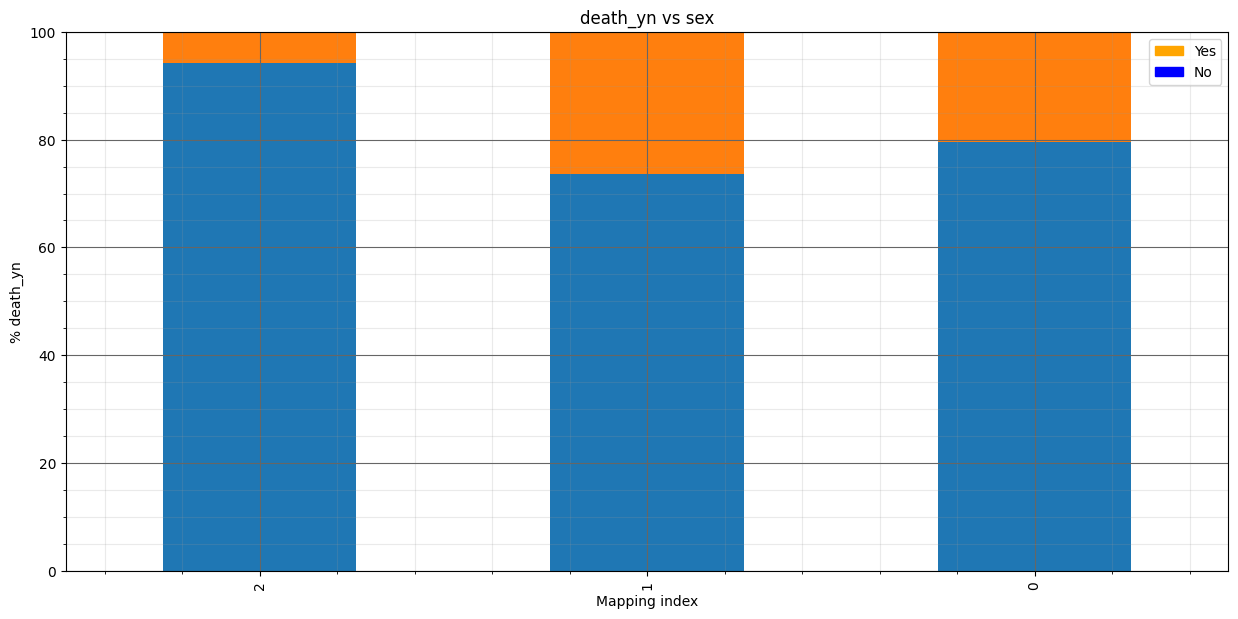

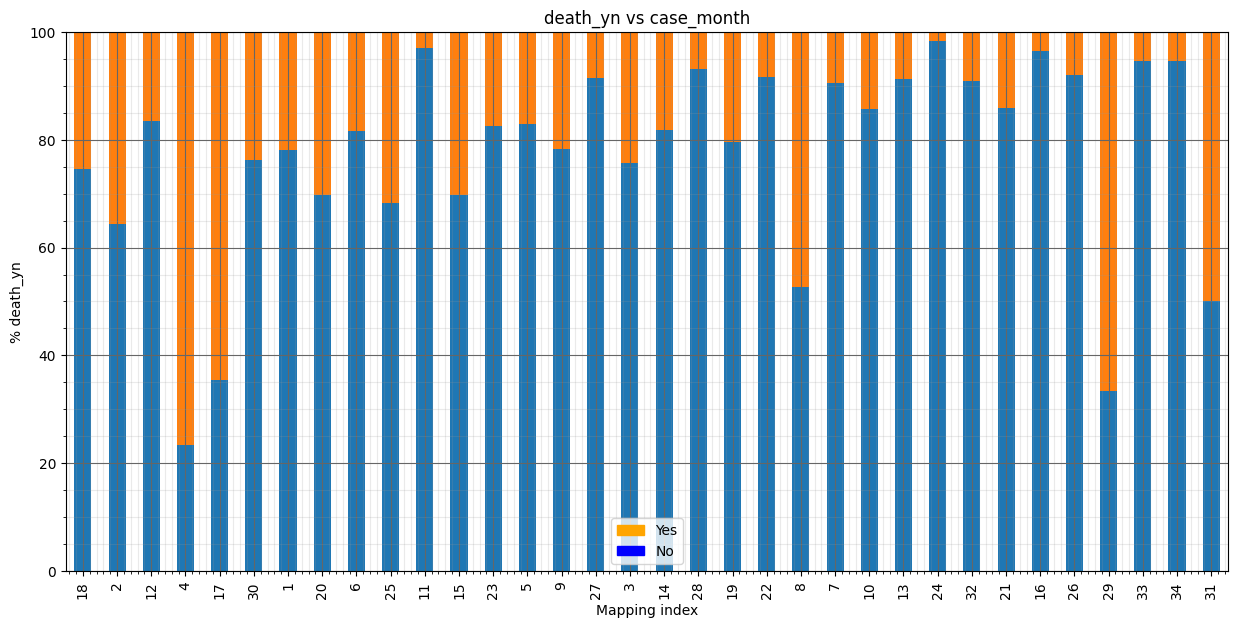

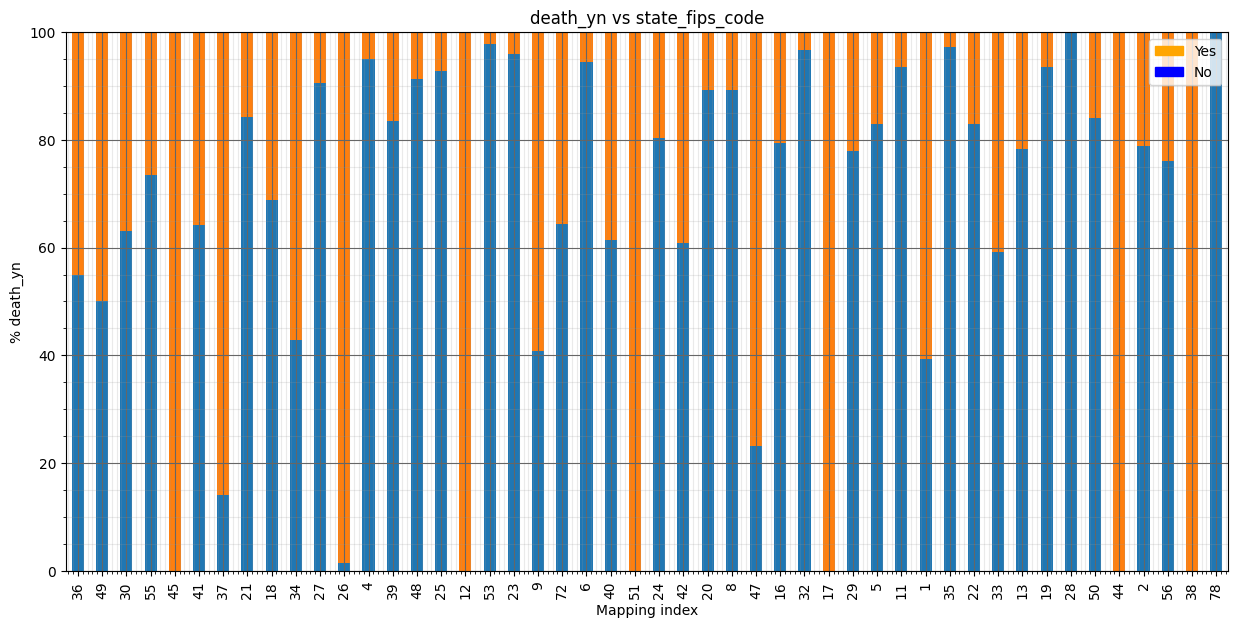

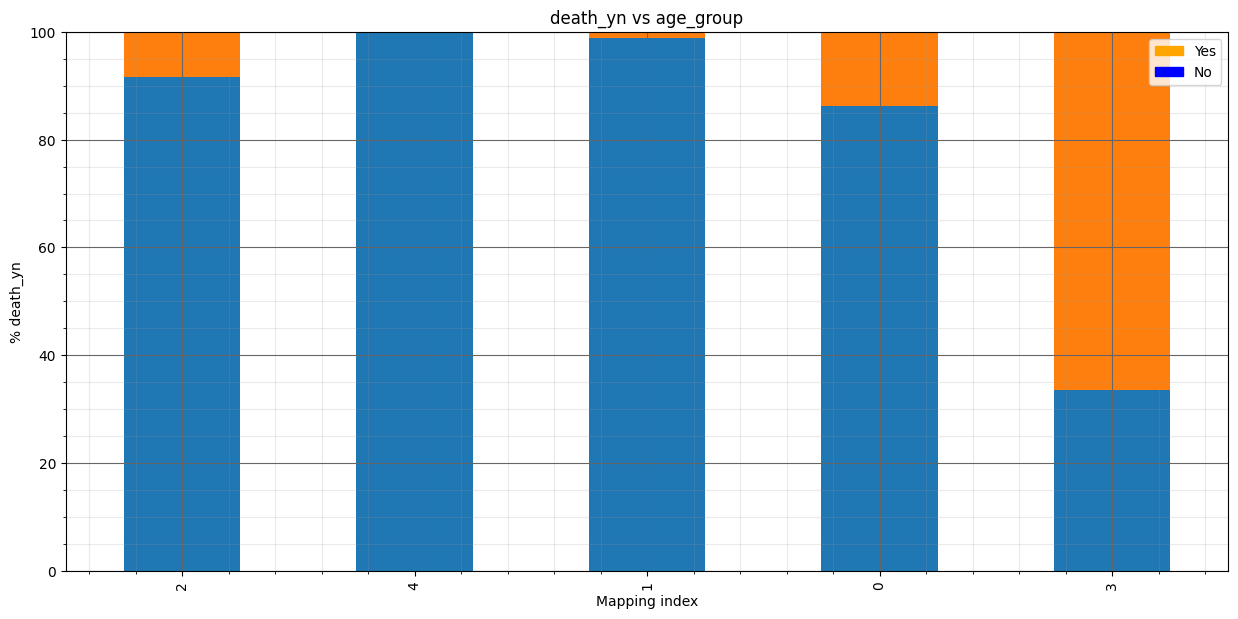

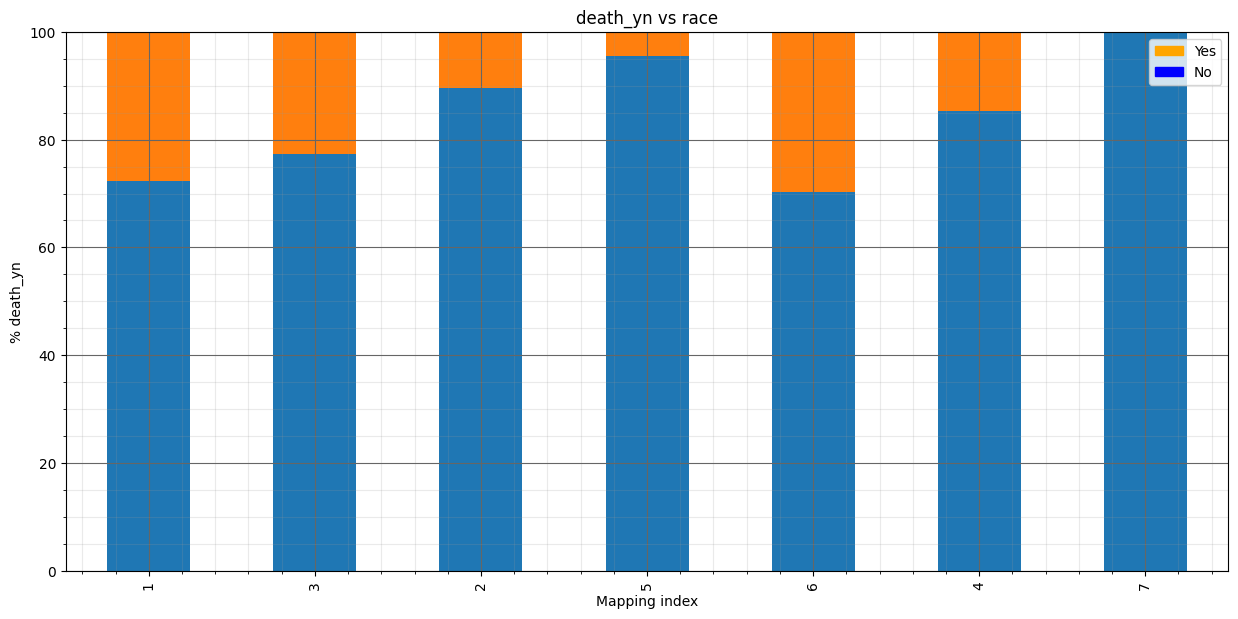

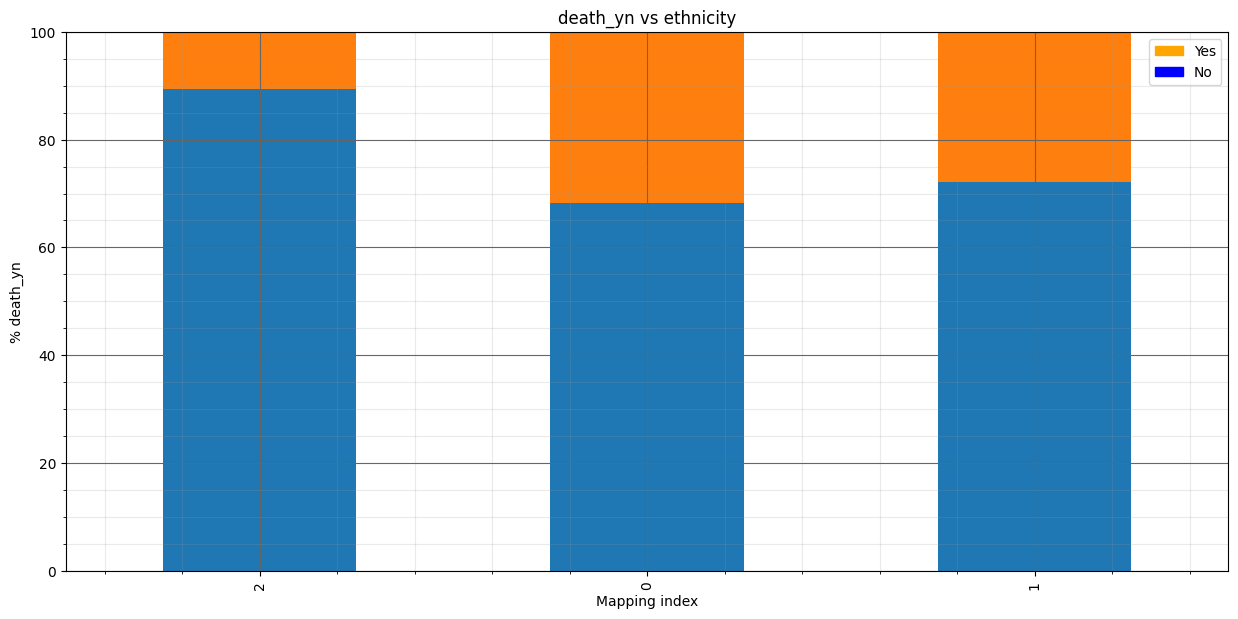

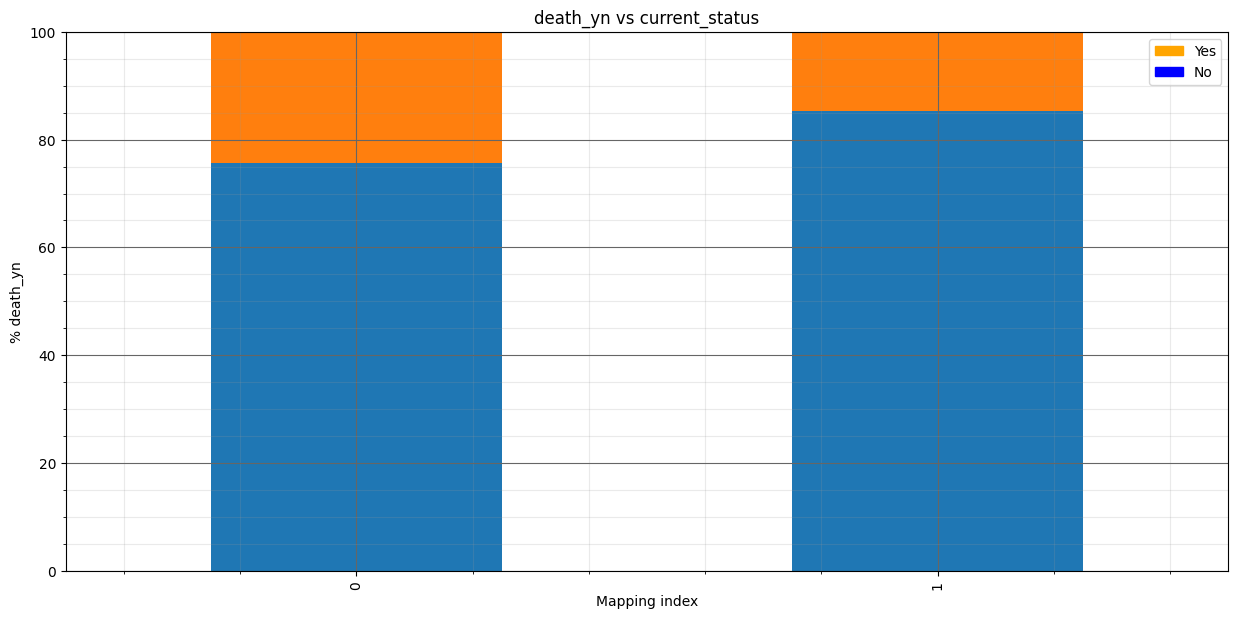

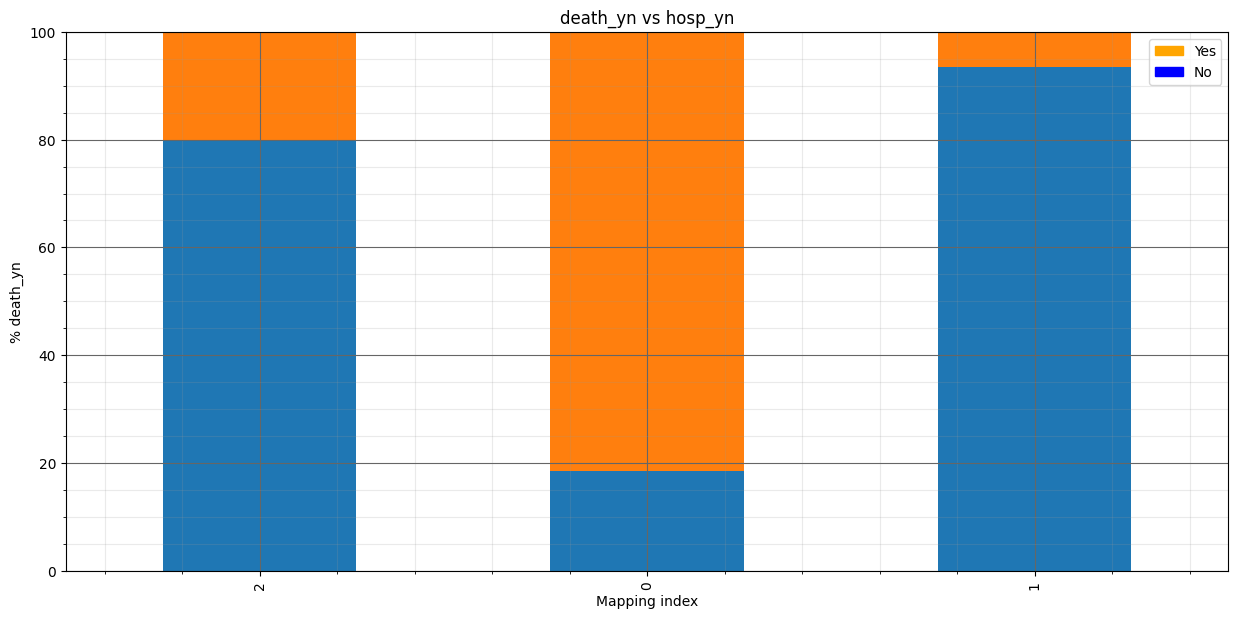

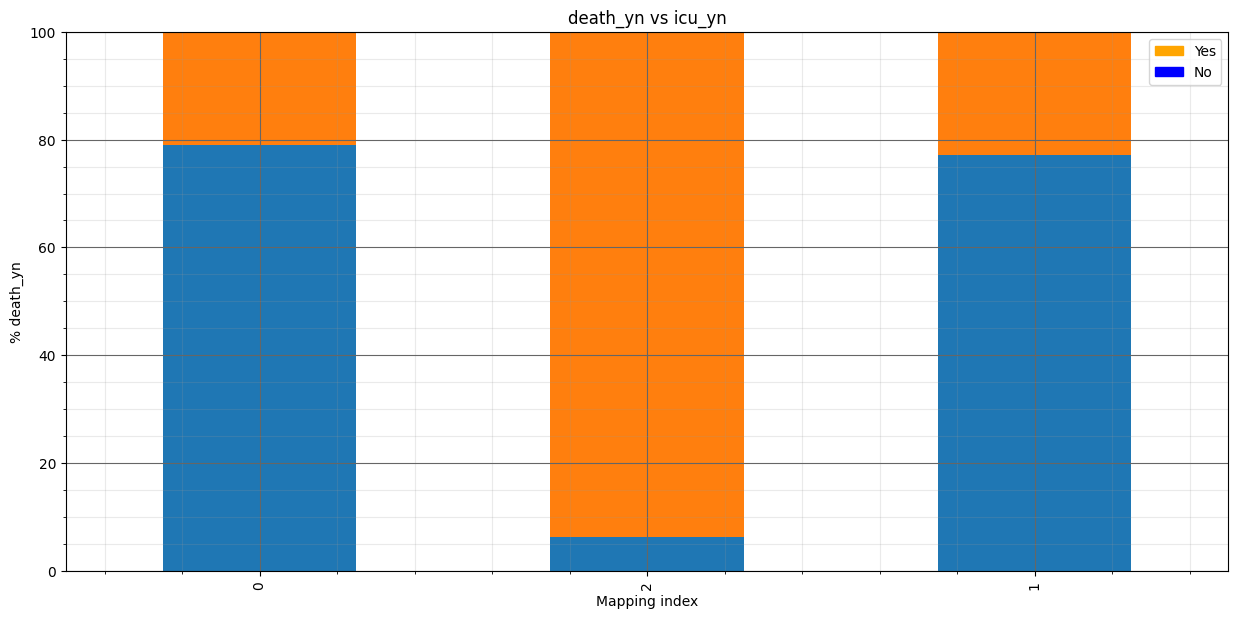

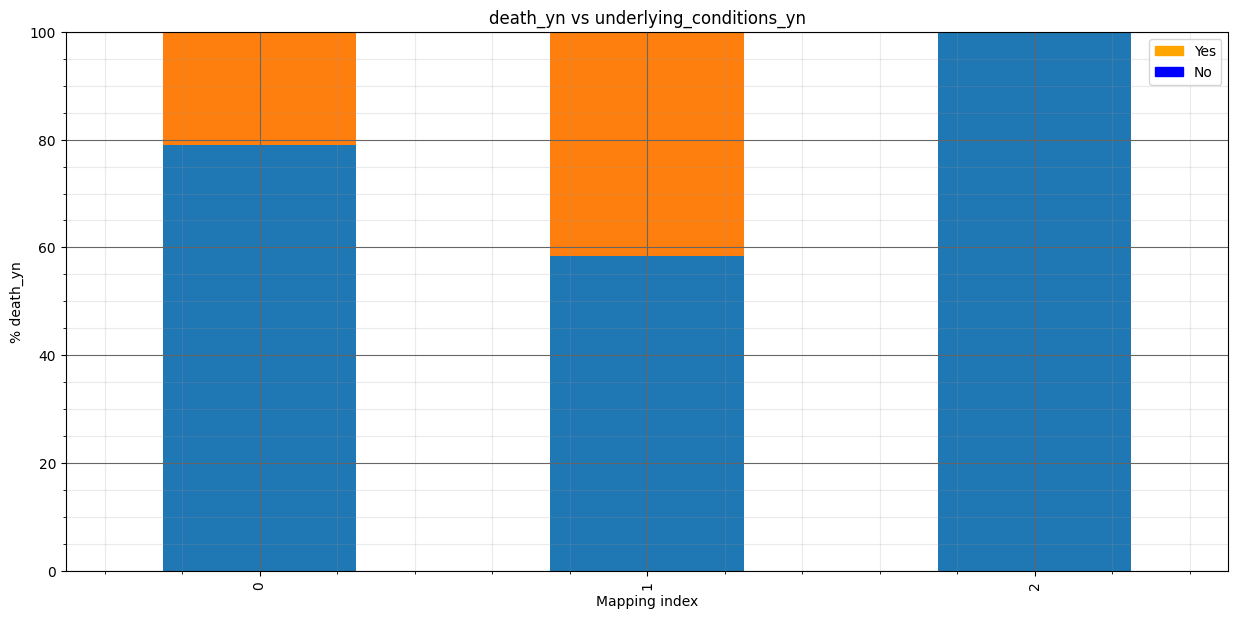

In [42]:
df_temp= pd.concat([X_train, y_train], axis=1)
# for each categorical feature create a stacked bar plot
for categorical_feature in categorical_column:
    # Using code from the module lab
    
    Death_yn = pd.unique(df_temp[categorical_feature].ravel())

    # add new column and set values to zero
    df_temp['percent'] = 0

    #print header
    print("\n", categorical_feature)
    print("Index \t Count")

    # for each mapping category
    for i in Death_yn:

        count = df_temp[df_temp[categorical_feature] == i].count()['death_yn']

        count_percentage = (1 / count) * 100

        # print out index vs count
        print(i, "\t", count)

        index_list = df_temp[df_temp[categorical_feature] == i].index.tolist()
        for ind in index_list:
            df_temp.loc[ind, 'percent'] = count_percentage

    group = df_temp[['percent',categorical_feature,'death_yn']].groupby([categorical_feature,'death_yn']).sum()

    my_plot = group.unstack().plot(kind='bar', stacked=True, title=f"death_yn vs {categorical_feature}", figsize=(15,7), grid=True)

    # add legend
    red_patch = mpatches.Patch(color='orange', label='Yes')
    blue_patch = mpatches.Patch(color='blue', label='No')
    my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

    # add gridlines
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    
    # set X-axis labels
    x_labels = [str(i) for i in Death_yn]
    my_plot.set_xticklabels(x_labels)
    
    # add labels
    my_plot.set_xlabel("Mapping index")
    my_plot.set_ylabel("% death_yn")
    my_plot.set_ylim([0,100])
    
# drop 'percent' that was used only for stacked bar plot
df_temp = df_temp.drop("percent", 1)


#### Reminder of scale meanings

| underlying_conditions_yn| hosp_yn | icu_yn             |meaning
|-------------|----------|---------------------|---------------|
| 0           | 0        | 0    |Missing|
| 1           | 1        | 1         |Yes|
| 2           | 2        | 2          |No|

| sex   |meaning
|-------------|----------|
| 0       | Missing|
| 1       | Male|
| 2       | Female|

| ethnicity   |meaning
|-------------|----------|
| 0       | Missing|
| 1       | Hispanic/Latino|
| 2       | Non-Hispanic/Latino|

| age_group   |meaning
|-------------|----------|
| 0       | Missing|
| 1      | 0-17 years old|
| 2       | 18 to 49 years|
| 3       | 50 to 64 years|
| 4       | 65+ years|

numbers of case_month meaning are in above cells


#### Interpretation of the results
##### death_yn vs sex
- Observing the plots we can see that Male has higher death proportion.
- Two groups of sex has similar quantities, which is good for prediction and model building.
- It is likely the binary outcome will capture this data sufficiently

##### death_yn vs case_month
- Observing the plots we can see that the death proportion varys from date to date
- So we can learn more in the later prediction part
- It is likely the binary outcome will capture this data sufficiently

##### death_yn vs age_group
- Observing the plot above we can see that senior group(65+ years) has highest death rate, that make sence because technically they have more underlying disease than young people. 

##### death_yn vs race
- Observing the plot and the amount of each race above we can see that the count from race to race are vary different, race 7 has only 2 samples and both of them are alive. Race 1 has over 14000 count samples.
- Large gaps between sample sizes will result in model predictions being too far from reality. So we'll remove this feature.

##### death_yn vs underlying_conditions_yn
- Observing the plot and the amount of each value above we can see that the count of values are vary different, "No" has only 25 samples and all of them are alive. "Yes" has over 2000 count samples.
- While that make sense, because we all know that people with underlying disease has higher death property, so we will keep this feature.

##### death_yn vs ethnicity
- Observing the plot and the amount of each ethnicity above we can see that the count of values are vary different, "Non-Hispanic/Latino" has over 14000 samples with "Hispanic/Latino" has only 1957 sample, gap is over 7:1
- Too large a gap in data volume, we will remove this feature

##### death_yn vs current_status
- Observing the plot and the amount of each ethnicity above we can see that there's tiny death rate(10 %) gap between two values, and their amount has a large gap over 5:1
- Same reason with above, we will remove this feature

##### death_yn vs county_fips_code
- We will remove this feature because it has similiar function to state_fips_code

##### death_yn vs hosp_yn
- Observing the plot and the amount of each value above we can see that there's small death rate(around 15 %) gap between two values, and their amount gap is around 4:1
- We will keep this feature first, because in common case people who choose to be admitted to hospital are more seriously ill

##### death_yn vs icu_yn
- Observing the plot and the amount of each value above we can see that there's huge death rate(around 75 %) gap between two values, and their amount gap is around 4:1
- For the same reaspn above, we will keep this feature first.


**In conclusion,we will delete county_fips_code,current_states, ethnicity and race 4 features.**

### 1.2.4 Summary & Drop Features
From Categorical vs Target (1.2.3) we identified the following to be dropped

In [43]:
low_value_features=['county_fips_code','current_status', 'ethnicity', 'race' ]

We will now drop these features
- Before dropping we will duplicate the original dataframe, df, and label it df_rev1
- We will drop features from this copy only (df_rev1)
- This will allow us to revert to the original dataset later if we decide to compare the performance of the reduced dataset (df_rev1) with the original dataset (df)

In [44]:
# before dropping make copy of original
df_rev1 = df.copy()
# drop low value features
df_rev1.drop(low_value_features, 1, inplace=True)
print('\nRemaining columns:', df_rev1.columns)
print('\nNew shape:', df_rev1.shape)


Remaining columns: Index(['case_month', 'state_fips_code', 'age_group', 'sex', 'hosp_yn',
       'icu_yn', 'death_yn', 'underlying_conditions_yn'],
      dtype='object')

New shape: (34308, 8)


## 1.3 Prepare dataset for modeling
Now we have picked our descriptive features for the whole dataset, a number of additional steps will need to be taken to prepare the dataset for modeling 
- We will then set up the train test split again based on the dataset with the dummies included

### Setting up the train/test split
- The Target is stored in dataframe "y"
- The remaining features are stored in dataframe "X"
- Both are split into training and test subsets

In [45]:
# y is the target
y = df_rev1["death_yn"]
# X is everything else
X = df_rev1.drop(["death_yn"],1)
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

print("original range is: ",df_rev1.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  34308
training range (70%):	 rows 0 to 24015
test range (30%): 	 rows 24015 to 34308


In [46]:
print("\nDescriptive features in X:\n", X_train.head(5))
print("\nTarget feature in y:\n", y_train.head(5))


Descriptive features in X:
        case_month  state_fips_code  age_group  sex  hosp_yn  icu_yn  \
26271          18               36          2    2        2       0   
18934           2               49          4    1        2       0   
2760           12               30          4    1        0       0   
31674           4               55          2    2        2       0   
1704           17               45          4    2        1       0   

       underlying_conditions_yn  
26271                         0  
18934                         0  
2760                          0  
31674                         0  
1704                          0  

Target feature in y:
 26271    0
18934    1
2760     1
31674    0
1704     1
Name: death_yn, dtype: int64


#### Reset the indexes of the training and test splits
- We can see from the X_train printout below that the indexes are no longer consecutive
- This is the same for y_train, X_test, y_test
- This will need to be dealt with next as it will effect merging of dataframes in the coming sections

In [47]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)

,case_month,state_fips_code,age_group,sex,hosp_yn,icu_yn,underlying_conditions_yn
0,18,36,2,2,2,0,0
1,2,49,4,1,2,0,0
2,12,30,4,1,0,0,0
3,4,55,2,2,2,0,0
4,17,45,4,2,1,0,0


The datasets are now ready for modeling

## (2) Linear Regression Model
#### 2.1 Train a linear regression model using only the descriptive features selected from part 1 above

In [48]:
# Train aka fit, a model using all continuous and categorical features.
multiple_linreg = LinearRegression().fit(X_train, y_train)

#### 2.2 Print out the coefficients learned by the model

In [49]:
# Print the weights learned for each feature.
print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", multiple_linreg.coef_)
print("\nIntercept is: \n", multiple_linreg.intercept_)
print("\nFeatures and coeficients: \n", list(zip(X_train.columns, multiple_linreg.coef_)))


Features are: 
 Index(['case_month', 'state_fips_code', 'age_group', 'sex', 'hosp_yn',
       'icu_yn', 'underlying_conditions_yn'],
      dtype='object')

Coeficients are: 
 [-0.00614637 -0.00299383  0.21975728 -0.04381057 -0.0651951   0.04048999
  0.07478332]

Intercept is: 
 -0.04563245284988743

Features and coeficients: 
 [('case_month', -0.006146371111568566), ('state_fips_code', -0.0029938260898324173), ('age_group', 0.21975728400066113), ('sex', -0.0438105726191949), ('hosp_yn', -0.06519510161080012), ('icu_yn', 0.04048999092636127), ('underlying_conditions_yn', 0.07478332051422736)]


#### 2.3 Printing 100 predicted target features and evaluate the prediction
- Here we will print the predicted target feature value for the first 100 training examples. 
- We will threshold the predicted target feature value given by the linear regression model at 0.5, to get the predicted class for each example. 
    - If value is >= 0.5 it is cast to 1, if < 0.5 it is cast to 0

In [50]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_linreg_predictions_train = (multiple_linreg.predict(X_train) >= 0.5) * 1.0

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_train, pd.DataFrame(multiple_linreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(100))


Predictions with multiple linear regression: 

    death_yn  Predicted
0          0        0.0
1          1        1.0
2          1        1.0
3          0        0.0
4          1        0.0
..       ...        ...
95         0        0.0
96         0        0.0
97         0        0.0
98         1        1.0
99         0        0.0

[100 rows x 2 columns]


#### 2.4 Evaluation metrics based on training data
- We will print the classification evaluation measures computed on the training set (e.g. Accuracy, Confusion matrix, Precision, Recall, F1)
- We will discuss findings based on these measures

In [51]:
# Some more evaluation metrics.
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_linreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_linreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_linreg_predictions_train))
print("======================================================")

==================== Train Data =======================
Accuracy:  0.8816989381636477
Confusion matrix: 
 [[17056  1479]
 [ 1362  4118]]
Classification report:
                precision    recall  f1-score   support

           0       0.93      0.92      0.92     18535
           1       0.74      0.75      0.74      5480

    accuracy                           0.88     24015
   macro avg       0.83      0.84      0.83     24015
weighted avg       0.88      0.88      0.88     24015



##### Interpretation of results
- Accuracy
    - This is simply stating how often the model is correct. We have an accuracy of 88%
- Confusion Matrix
    - [0][0] TRUE NEGATIVE - The number that is predicted 0 that was actually 0
    - [0][1] FALSE POSITIVE - The number that is predicted 1 that is actually 0
    - [1][0] FALSE NEGATIVE - The number that is predicted 0 that is actually 1
    - [1][1] TRUE POSITIVE - The number that is predicted 1 that is actually 1
- Precision - How good the model is at predicting the positive class
    - What % of the predicted positive are actually positive
    - It is the number values correctly predicted positive over the total number of  positive values
    - Precision Positive is 0.74
    - Precision Negative is 0.93
- Recall
    - What % of the positive values did we predict
    - Is the number correctly predicted positive over the total number actual positive
    - Recall Positive is 0.75
    - Recall Negative is 0.92
- F1 Score
    - Is an a weighted average of Precision and recall
    - F1 Score Positive is 0.74
    - F1 Score Negative is 0.92

Summary
- Theses values seem reasonable. 
- The model is a little better at predicting the negative class.
- This makes sense as the model has more negative data to learn from - it is the majority class. 
- This is ideal as majority saved their life in covid.
- It is good that the model make covid death rate looks lower.
- The down side of this is more people who will have higher death possibilities are flagged as survival.

#### 2.6 Evaluate the model using the hold-out (30% examples) test set
- The results from the test data will be compared the results from the training data.
- In addition they will be compared to the results from a cross-validated model (i.e. a new model trained and evaluated using cross-validation on the full dataset).

Printing Actual death_yn vs predicted based on test data

In [52]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_linreg_predictions_test = (multiple_linreg.predict(X_test) >= 0.5) * 1.0

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_test, pd.DataFrame(multiple_linreg_predictions_test, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(100))


Predictions with multiple linear regression: 

    death_yn  Predicted
0          1        1.0
1          0        0.0
2          0        0.0
3          0        0.0
4          0        0.0
..       ...        ...
95         1        0.0
96         0        0.0
97         1        1.0
98         0        1.0
99         0        0.0

[100 rows x 2 columns]


##### Evaluation metrics based on test data

In [53]:
# Some more evaluation metrics.
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, multiple_linreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, multiple_linreg_predictions_test))
print("Classification report - Test data:\n ", metrics.classification_report(y_test, multiple_linreg_predictions_test))
print("\n==================== Train Data ======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_linreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_linreg_predictions_train))
print("\nClassification report: - Training data\n ", metrics.classification_report(y_train, multiple_linreg_predictions_train))

==================== Test Data =======================
Accuracy:  0.8840959875643641
Confusion matrix: 
 [[7315  616]
 [ 577 1785]]
Classification report - Test data:
                precision    recall  f1-score   support

           0       0.93      0.92      0.92      7931
           1       0.74      0.76      0.75      2362

    accuracy                           0.88     10293
   macro avg       0.84      0.84      0.84     10293
weighted avg       0.88      0.88      0.88     10293


==================== Train Data ======================
Accuracy:  0.8816989381636477
Confusion matrix: 
 [[17056  1479]
 [ 1362  4118]]

Classification report: - Training data
                precision    recall  f1-score   support

           0       0.93      0.92      0.92     18535
           1       0.74      0.75      0.74      5480

    accuracy                           0.88     24015
   macro avg       0.83      0.84      0.83     24015
weighted avg       0.88      0.88      0.88     24015

**Interpretation of test results and comparison with training results**
- Accuracy
    - The accuracy of the test data is marginally higher 88.40% vs 88.16%. 
- Precision
    - precision of test and training data shows no difference,means model has fitted the test and training data well with no over- or under-fitting.
- Recall
    - The recall score for predicting the servival case has increased from 75% to 76%.
    - The recall score for predicting the death case shows no difference.
- F1
    - The f1 score for predicting the servival case shows no difference.
    - The f1 score for predicting the death case has increased from 77% to 75%.

**Summary**
- These values are a little higher than expected as we are now testing the model prediction on data it has not seen before
- This is a good sign that the model is generalising
- More comparisons need to be made and this is where cross validation steps in

#### 2.7 Cross validation
- We will now perform cross validation on the linear regression model. 
- Here we perform the same evaluation as above but multiple times
- Each time the data is shuffled so we get a slightly different view of the data for training and testing
- This works well for evaluating on a limited set of data
- We will store the results in a dictionary for later use

First we need to create a function to perform this cross validation. Sklearn does not provide one for linear regression. However it does for logistic and random forests models
- Cross validation Function can be seen below

In [54]:
def cross_val_LinReg(X, y, cv=3, scoring='accuracy'):
    """Functions to carry out cross validation on the linear regression model
    Default number of validations is 3. The randon state will be updated 
    at each iteration to allow our results to be repeated"""
    
    # store results
    results = []
    # evaluate cv times and append to results
    for i in range(cv):
        # set up train test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i , test_size=0.3)
        # generate model
        multiple_linreg = LinearRegression().fit(X_train, y_train)
        # threshold
        multiple_linreg_predictions = (multiple_linreg.predict(X_test) >= 0.5) * 1.0
        # calc score
        if scoring=='accuracy':
            score = metrics.accuracy_score(y_test, multiple_linreg_predictions)
        elif scoring=='precision':
            score = metrics.precision_score(y_test, multiple_linreg_predictions)
        elif scoring=='f1':
            score = metrics.f1_score(y_test, multiple_linreg_predictions)
        elif scoring=='recall':
            score = metrics.recall_score(y_test, multiple_linreg_predictions)
        # append to results
        results.append(score)
    return results

We will now create an additional function to perform 10 fold cross validation and store results into a dataframe
- This will be used to simplify further analysis the dataset, looking at accuracy, precision, recall, f1.

In [55]:
def cross_val_LinReg_DF(X,y):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    linRegResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']
    
    for metric in test_metrics:
        # generate test results
        result = cross_val_LinReg(X, y, cv=10, scoring=metric)
        length = len(result)
        # store result in dict
        linRegResults[metric] = sum(result)/length

    # create dataframe with results
    LinRegDF = pd.DataFrame.from_dict(linRegResults, orient='index', columns=['Linear_Regression'])
    
    return LinRegDF

Preform 10 fold cross validation using cross_val_LinReg_DF function
- Results summarised below

In [56]:
linRegDF = cross_val_LinReg_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
linRegDF

Mean results from 10 fold cross validation are:


,Linear_Regression
accuracy,0.881619
precision,0.735794
recall,0.748506
f1,0.742000


These results are similar with the previous results. We have taken the mean of 10 sets of results. 

## (3) Logistic Regression   

#### 3.1 Train a logistic regression model using only the descriptive features selected from part 1 above

In [57]:
# Train aka fit, a model using all continuous and categorical features.
multiple_logisticreg = LogisticRegression().fit(X_train, y_train)

#### 3.2 Print out the coefficients learned by the model

In [58]:
# Print the weights learned for each feature.
print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", multiple_logisticreg.coef_[0])
print("\nIntercept is: \n", multiple_logisticreg.intercept_)
print("\nFeatures and coeficients: \n", list(zip(X_train.columns, multiple_logisticreg.coef_[0])))


Features are: 
 Index(['case_month', 'state_fips_code', 'age_group', 'sex', 'hosp_yn',
       'icu_yn', 'underlying_conditions_yn'],
      dtype='object')

Coeficients are: 
 [-0.07121721 -0.02852504  2.5004524  -0.33271883 -0.78693473  0.33415731
  0.57256428]

Intercept is: 
 [-6.45307449]

Features and coeficients: 
 [('case_month', -0.07121721229428805), ('state_fips_code', -0.02852503936589895), ('age_group', 2.500452396908418), ('sex', -0.3327188327612954), ('hosp_yn', -0.786934726270316), ('icu_yn', 0.3341573058504251), ('underlying_conditions_yn', 0.5725642754554244)]


#### 3.3 Interpreting the results 

- In this model, we can see that the most important feature is 'age_group', which has the highest coefficient of 2.50. This suggests that age is the most important predictor of the positive class, and as age increases, the probability of belonging to the positive class also increases.

- Other features that have a positive coefficient are 'icu_yn' and 'underlying_conditions_yn', indicating that having been in an ICU or having underlying medical conditions is associated with a higher probability of belonging to the positive class.

- On the other hand, features with negative coefficients, such as 'hosp_yn' and 'sex', are negatively associated with the positive class, suggesting that being hospitalized or being male decreases the probability of belonging to the positive class.

#### 3.4 Printing 100 predicted target features and evaluate the prediction
- Here we will print the predicted target feature value for the first 100 training examples based on training data

In [59]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_logisticreg_predictions_train = multiple_logisticreg.predict(X_train)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelogisticreg = pd.concat([y_train, pd.DataFrame(multiple_logisticreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelogisticreg.head(100))


Predictions with multiple linear regression: 

    death_yn  Predicted
0          0          0
1          1          1
2          1          1
3          0          0
4          1          0
..       ...        ...
95         0          0
96         0          0
97         0          0
98         1          0
99         0          0

[100 rows x 2 columns]


#### 3.5 Evaluation metrics based on training data
- We will print the classification evaluation measures computed on the training set (e.g. Accuracy, Confusion matrix, Precision, Recall, F1)
- We will discuss finding based on these measures

In [60]:
# Some more evaluation metrics.
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_logisticreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_logisticreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_logisticreg_predictions_train))
print("======================================================")

==================== Train Data =======================
Accuracy:  0.8850301894649177
Confusion matrix: 
 [[17025  1510]
 [ 1251  4229]]
Classification report:
                precision    recall  f1-score   support

           0       0.93      0.92      0.92     18535
           1       0.74      0.77      0.75      5480

    accuracy                           0.89     24015
   macro avg       0.83      0.85      0.84     24015
weighted avg       0.89      0.89      0.89     24015



Interpretation of results
- Accuracy
    - We have an accuracy of 88.5%
- Precision - How good model is a prediction the positive class
    - Precision Positive is 0.74
    - Precision Negative is 0.93
- Recall - What % of the positive values did we predict
    - Recall Positive is 0.77
    - Recall Negative is 0.92
- F1 Score - Is an a weighted average of Precision and recall
    - F1 Score Positive is 0.75
    - F1 Score Negative is 0.92


Summary
- These values seem reasonable
- Accuracy is tiny higher than linear regression model
- The logistic model is also a little better at predicting the negative class.

#### 3.6 Evaluate the model using the hold-out (30% examples) test set
- These results from the test data will be compared the results from the training data.
- In addition they will be compared to the results from a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).

Printing Actual death_yn vs predicted based on test data

In [61]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_logisticreg_predictions_test = multiple_logisticreg.predict(X_test)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelogisticreg = pd.concat([y_test, pd.DataFrame(multiple_logisticreg_predictions_test, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelogisticreg.head(20))


Predictions with multiple linear regression: 

    death_yn  Predicted
0          1          1
1          0          0
2          0          0
3          0          0
4          0          0
5          0          0
6          0          0
7          1          1
8          0          1
9          0          0
10         0          0
11         0          0
12         1          1
13         0          0
14         0          0
15         0          0
16         0          1
17         0          0
18         0          0
19         0          0


Evaluation based on test data

In [62]:
# Some more evaluation metrics.
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, multiple_logisticreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, multiple_logisticreg_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, multiple_logisticreg_predictions_test))
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_logisticreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_logisticreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_logisticreg_predictions_train))
print("======================================================")

==================== Test Data =======================
Accuracy:  0.8851646750218595
Confusion matrix: 
 [[7297  634]
 [ 548 1814]]
Classification report:
                precision    recall  f1-score   support

           0       0.93      0.92      0.93      7931
           1       0.74      0.77      0.75      2362

    accuracy                           0.89     10293
   macro avg       0.84      0.84      0.84     10293
weighted avg       0.89      0.89      0.89     10293

==================== Train Data =======================
Accuracy:  0.8850301894649177
Confusion matrix: 
 [[17025  1510]
 [ 1251  4229]]
Classification report:
                precision    recall  f1-score   support

           0       0.93      0.92      0.92     18535
           1       0.74      0.77      0.75      5480

    accuracy                           0.89     24015
   macro avg       0.83      0.85      0.84     24015
weighted avg       0.89      0.89      0.89     24015



Interpretation of test results and comparison with training results 
- Accuracy
    - The accuracy of the test data is tiny higher 88.52% vs 88.50%. 
- Precision
    - The presicion score for predicting the positive and negative cases show no changes, thus we can say the model fitting very well.
- Recall
    - The recall score for predicting the positive and negative cases show no changes, thus we can say the model fitting very well.
- F1
    - The F1 score for predicting the positive cases show no changes.
    - The F1 score for predicting the negative case increased from 0.92 to 0.93.

Summary
- These values see reasonable
- The accuracy level have increased tiny higher as we are testing the model on data it has not see before
- This is a good sign that the model is generalizing
- More comparisons need to be made and this is where cross validation steps in

#### 3.7 Cross validation
We will first create function to perform 10 fold cross validation and store results into dataframe
- This will be used to simplify further analysis the dataset, looking at accuracy, precision, recall, f1.

In [63]:
def cross_val_LogReg_DF(X,y):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    logRegResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        # generate test results
        result = cross_val_score(LogisticRegression(), X, y, scoring=metric, cv=10)
        # store result in dict
        logRegResults[metric] = result.mean()
        
    # create dataframe with results
    LogRegDF = pd.DataFrame.from_dict(logRegResults, orient='index', columns=['Logistic_Regression'])
    
    return LogRegDF

Preform 10 fold cross validation using cross_val_LogReg_DF function
- Results summarised below

In [64]:
logRegDF = cross_val_LogReg_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
logRegDF

Mean results from 10 fold cross validation are:


,Logistic_Regression
accuracy,0.885070
precision,0.739458
recall,0.768045
f1,0.753401


These results are in line with the previous results. We have taken the mean of 10 sets of results. 

## (4) Random Forest Model

### 4.1 Train a random forest model using only the descriptive features selected from part 1 above 
- A random forest model will now be trained on our test data. 
- We use the RandomForestClassifier() function. 
- The random state will be set to 1 to allow the results to be repeated

In [65]:
# Train RF with 100 trees
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features='auto', oob_score=True, random_state=1)

### 4.2 Understanding the Random Forest model
We will now try to understand how this random forest model works
- We will first start by trying to understand a decision tree 
- A random forest is made up of an ensemble/collection of decision trees
- Decision tree
    - A decision tree is a set of if-then-else rules based on splitting the data based on specific features
    - The decision on which feature to split on is based on the information gain (Gini index). 
    - The tree will always split on the feature that gives the highest information gain
    - The feature with the highest information gain will sit at the root of each decision tree
    - Each decision tree will be a single prediction
- Random Forest 
    - The random forest is made up of a number of decision trees
    - The output of the random forest is base on the majority output of all decision trees combined
    - This gives reliable results but can be hard to interpret
    - The random forest will keep track of the importance of features in terms of information gain, which we will see
    
We will now look at an example of a single decision tree to get a better understanding

####  4.2.1  Train Decision tree
We will train 2 decision trees, with the same test data 
- One with max_depth=4 and the other max_depth=10
- Max depth determines how deep a decision tree can go before it must give an answer

In [66]:
dtc4 = DecisionTreeClassifier(max_depth=4, random_state=1)
dtc10 = DecisionTreeClassifier(max_depth=10, random_state=1)
dtc4.fit(X_train, y_train)
dtc10.fit(X_train, y_train)
print("Max depth 4: \n",dtc4)
print("Max depth 10: \n",dtc10)

Max depth 4: 
 DecisionTreeClassifier(max_depth=4, random_state=1)
Max depth 10: 
 DecisionTreeClassifier(max_depth=10, random_state=1)


####  4.2.2  Display Decision tree
We will create graph of each tree and store as an image

In [67]:
# create a Graphviz png
with open("DecisionTree4.dot", 'w') as f1:
    f1 = export_graphviz(dtc4, out_file=f1, feature_names=X_train.columns)
with open("DecisionTree10.dot", 'w') as f2:
    f2 = export_graphviz(dtc10, out_file=f2, feature_names=X_train.columns)
!dot -Tpng DecisionTree4.dot -o DecisionTree4.png
!dot -Tpng DecisionTree10.dot -o DecisionTree10.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.797522 to fit


We can see below the decision tree with max_depth=4
- We can see the root is age_group at value 3.5 - This splits the data best i.e. has the highest information gain
- For each split the the model selects the next best feature
- This continues until it reaches a leaf node where the data cannot be split anymore
- The output of this is the prediction
- We can see all paths have 5 branches

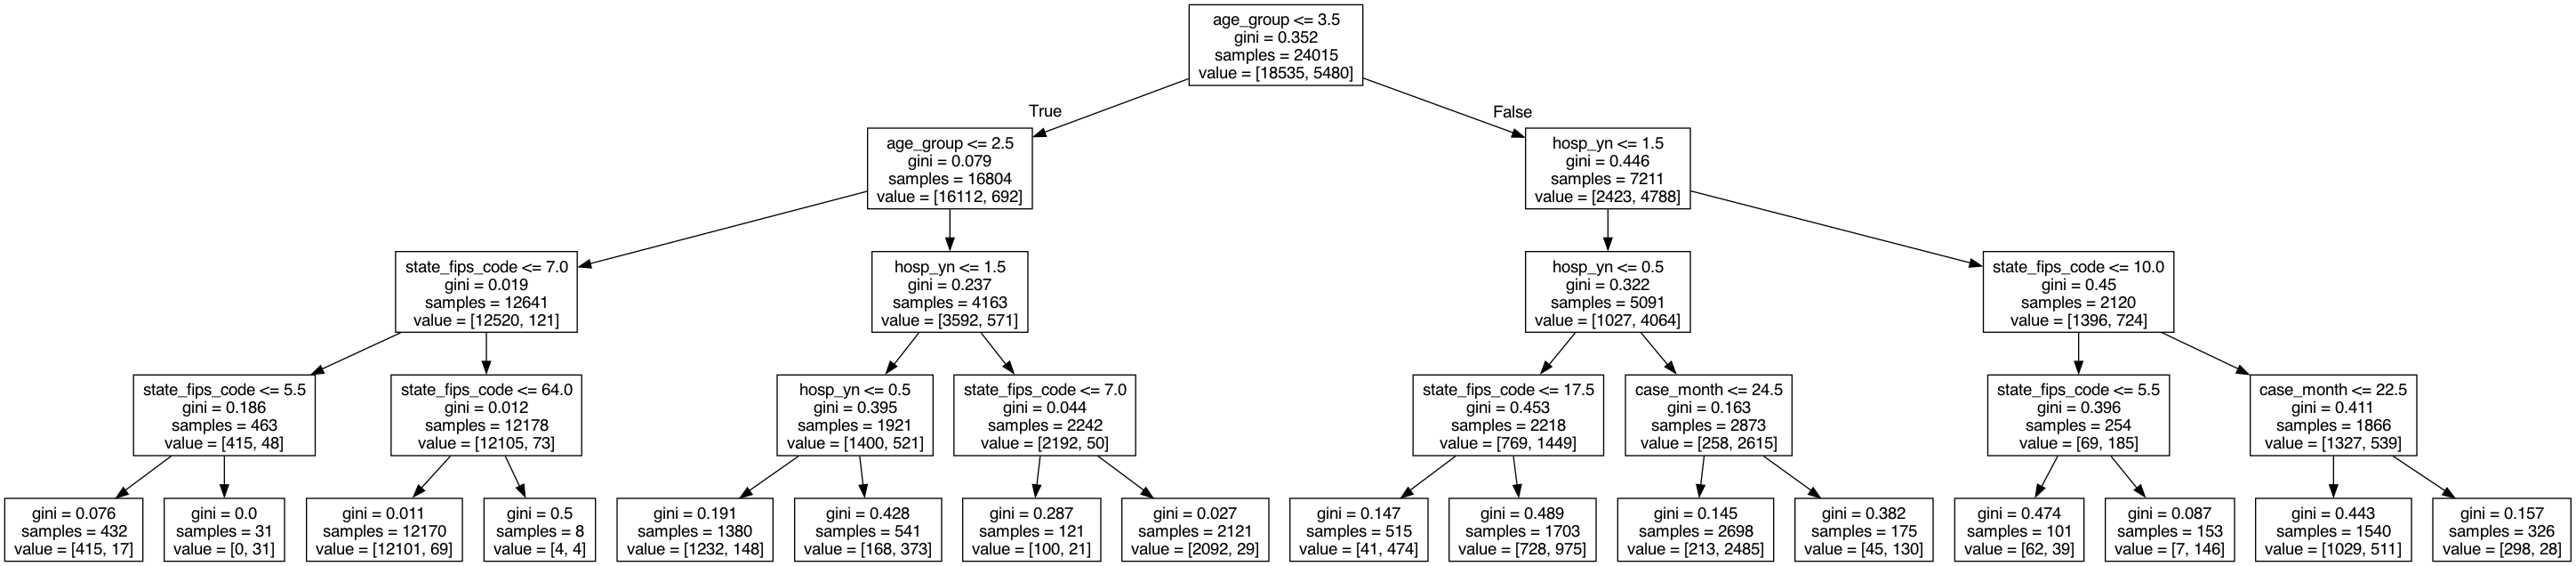

In [123]:
from IPython.display import Image
Image(filename='DecisionTree4.png')

Viewing a decision tree with maxdepth=10 shows how complicated this model becomes 
- This is only one example of a decision tree. 
- A Random forests has 100 decision trees by default
- Each decision tree is given a slightly different view of the data

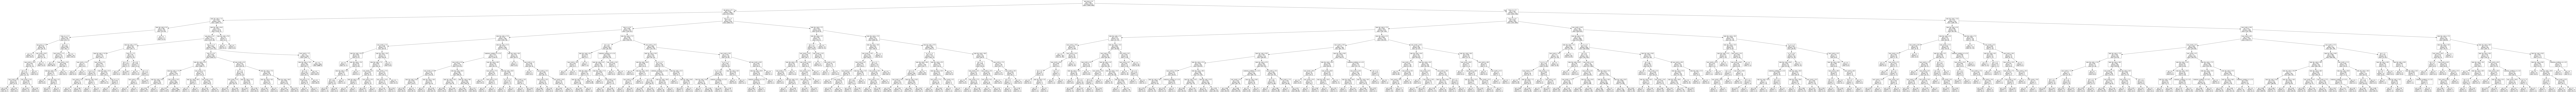

In [124]:
Image(filename='DecisionTree10.png')

#### 4.2.3 Interpretation of the random forest model
As mentioned above the random forest will keep track of the importance of features
- We can see from the dataframe below the results of this feature importance ranking
- The more important features are the features that the random forest has identified as having higher information gain
- This list is the combined result of the 100 decision trees that make up the random forest model
- This feature ranking will help us in our optimisation process going forward
    - What are the best features to keep?
    - What features can be safely dropped without loosing information?

In [68]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
importance.sort_values('importance', ascending=False)

,feature,importance
2,age_group,0.402522
1,state_fips_code,0.212251
4,hosp_yn,0.207371
0,case_month,0.131283
5,icu_yn,0.019846
3,sex,0.013422
6,underlying_conditions_yn,0.013304


We can see from the list above that "age_group" has the highest importance with a value of 0.402522. This is consistent with common sense as age is a well-known risk factor for many diseases. The features "state_fips_code", "hosp_yn", and "case_month" have decent importance, meaning they have a meaningful impact on the prediction. The feature "icu_yn", "sex", and "underlying_conditions_yn" have little importance.

### 4.3 Printing 100 predicted target features and evaluate the prediction 
- Here we will print the predicted target feature value for the first 100 training examples. 

In [69]:
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_train = rfc.predict(X_train)
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': y_train, 'PredictedClass': rfc_predictions_train})
df_true_vs_rfc_predicted.head(100)

,ActualClass,PredictedClass
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
95,0,0
96,0,0
97,0,0
98,1,1


### 4.4 Evaluation metrics based on training data
- We will print the classification evaluation measures computed on the training set (e.g. Accuracy, Confusion matrix, Precision, Recall, F1)
- We will discuss finding based on these measures

In [70]:
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))

==================== Train Data =======================
Accuracy:  0.9727253799708515
Confusion matrix: 
 [[18231   304]
 [  351  5129]]
Classification report:
                precision    recall  f1-score   support

           0       0.98      0.98      0.98     18535
           1       0.94      0.94      0.94      5480

    accuracy                           0.97     24015
   macro avg       0.96      0.96      0.96     24015
weighted avg       0.97      0.97      0.97     24015



##### Interpretation of results
- The Accuracy is high (0.973), which means the model has learned the results. The precision is also very high bothe  in 0 (alive) and 1 (death) metrics. This is clearly overfitting

### 4.5 Evaluate the model using the hold-out (30% examples) test set
- These results from the test data will be compared the results from the training data.
- In addition they will be compared to the results from a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).

In [71]:
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_test = rfc.predict(X_test)
df_true_vs_rfc_predicted_test = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': rfc_predictions_test})
df_true_vs_rfc_predicted_test.head(20)

,ActualClass,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0


Evaluation metrics based on test data

In [72]:
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, rfc_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, rfc_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, rfc_predictions_test))
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))
print("======================================================")

==================== Test Data =======================
Accuracy:  0.9327698435830176
Confusion matrix: 
 [[7604  327]
 [ 365 1997]]
Classification report:
                precision    recall  f1-score   support

           0       0.95      0.96      0.96      7931
           1       0.86      0.85      0.85      2362

    accuracy                           0.93     10293
   macro avg       0.91      0.90      0.90     10293
weighted avg       0.93      0.93      0.93     10293

==================== Train Data =======================
Accuracy:  0.9727253799708515
Confusion matrix: 
 [[18231   304]
 [  351  5129]]
Classification report:
                precision    recall  f1-score   support

           0       0.98      0.98      0.98     18535
           1       0.94      0.94      0.94      5480

    accuracy                           0.97     24015
   macro avg       0.96      0.96      0.96     24015
weighted avg       0.97      0.97      0.97     24015



##### Interpretation of test results and comparison with training results 
- Accuracy
    - This is simply stating how often the model is correct. We have an accuracy of 93%
- Confusion Matrix
    - [0][0] TRUE NEGATIVE - The number that is predicted 0 that was actually 0
    - [0][1] FALSE POSITIVE - The number that is predicted 1 that is actually 0
    - [1][0] FALSE NEGATIVE - The number that is predicted 0 that is actually 1
    - [1][1] TRUE POSITIVE - The number that is predicted 1 that is actually 1
- Precision - How good the model is at predicting the positive class
    - What % of the predicted positive are actually positive
    - It is the number values correctly predicted positive over the total number of  positive values
    - Precision Positive is 0.86 (decrease by 8% compared to training data)
    - Precision Negative is 0.95 (decrease by 3% compared to training data)
- Recall
    - What % of the positive values did we predict
    - Is the number correctly predicted positive over the total number actual positive
    - Recall Positive is 0.85 (decrease by 9% compared to training data)
    - Recall Negative is 0.96 (decrease by 2% compared to training data)
- F1 Score
    - Is an a weighted average of Precision and recall
    - F1 Score Positive is 0.85 (decrease by 9% compared to training data)
    - F1 Score Negative is 0.96 (decrease by 2% compared to training data)

Summary
- Theses scores are high compared to linear and logistic models
- The decrease of scores in positive data is higher than negative data
- The model is better at predicting the negative class.
- This makes sense as the model has more negative data to learn from - it is the majority class. 
- This is ideal as most people survived in covid.
- The down side of this is more people who actually dead will not be flagged as death

### 4.6 Cross validation
- We will preform cross validation and store the results in a dictionary for later use

In [73]:
def cross_val_RandomForest_DF(X,y, depth=None, estimators=100):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    # store results in dict
    RandomForestResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        # generate test results
        result = cross_val_score(RandomForestClassifier(n_estimators=estimators, max_features='auto', oob_score=True, random_state=1, max_depth=depth), X, y, scoring=metric, cv=10)
        # store result in dict
        RandomForestResults[metric] = result.mean()
    
    # create dataframe with results
    RandomForestDF = pd.DataFrame.from_dict(RandomForestResults, orient='index', columns=['Random_Forests'])

    return RandomForestDF

##### The results for Random Forests are summarized below

In [74]:
RandomForestDF = cross_val_RandomForest_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
RandomForestDF

Mean results from 10 fold cross validation are:


,Random_Forests
accuracy,0.937303
precision,0.862174
recall,0.863935
f1,0.863031


**Note**: The precision and recall here are for positive class (death_yn=1) by default.

#### The results above are inline with expectation
- The accuracy is the same
- The precision, recall and f1 are all a little lower but higher than the other models
- It is reasonable since random forest models can capture non-linear relationships between the features and the target variable better than linear regression and logistic regression models. Actually all our selected features are catogorical although we assign indexes to them.

### 4.7 Out of bag accuracy
- This is the out of bag error estimate 
- It is an internal error estimate of a random forest as it is being constructed.
- It is used as an additional measure and should be line with the cross validation results
- This is generally expected to be the lowest

In [75]:
# compute the out-of-bag classification accuracy
rfc.oob_score_

0.9372475536123256

This value is in line with the Cross validation results above

## (5) Improving Predictive Models

### 5.1 Which model of the ones trained above performs better at predicting the target feature? 
- The Random Forest performs best among three models, especially in terms of precision where it outperformed the other models by 13%. It also has 5% higher accuracy than other two models. Linear Regression and Logistic Regression have similar performance.
- Summary of the results so far can be seen below (based on predicting death (death_yn = 1))

In [76]:
ResultsDF = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.881619,0.885070,0.937303
precision,0.735794,0.739458,0.862174
recall,0.748506,0.768045,0.863935
f1,0.742000,0.753401,0.863031


### 5.2 Is the model more accurate than a simple model that always predicts the majority class
- We will compare our results above to a simple model which predicts for the majority class
- First we will get the breakdown of the test dataset and see which is the majority class

In [77]:
death_y_count = y_test[y_test == 1].count()
death_n_count = y_test[y_test == 0].count()
total = death_y_count + death_n_count
print(f'From original dataset: \t\tCount {total}')
print(f'Total number of death:\t {death_y_count}\t{round(death_y_count/len(y_test)*100,2)}%')
print(f'Total number alive:\t {death_n_count}\t{round(death_n_count/len(y_test)*100,2)}%')

From original dataset: 		Count 10293
Total number of death:	 2362	22.95%
Total number alive:	 7931	77.05%


In [78]:
# generate array of 10293 zeros (length of test dataset)
majority = np.zeros(10293)
# create dataframe 
df_majorityClass = pd.DataFrame(majority, columns=['prediction'])
# calculate scores of simple predictin vs actual
print("Accuracy: ", metrics.accuracy_score(y_test, df_majorityClass))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, df_majorityClass))
print("Classification report:\n ", metrics.classification_report(y_test, df_majorityClass))

Accuracy:  0.7705236568541728
Confusion matrix: 
 [[7931    0]
 [2362    0]]
Classification report:
                precision    recall  f1-score   support

           0       0.77      1.00      0.87      7931
           1       0.00      0.00      0.00      2362

    accuracy                           0.77     10293
   macro avg       0.39      0.50      0.44     10293
weighted avg       0.59      0.77      0.67     10293



- For predicting death the simple model fails completely as expected
- For predicting alive the simple model fares much better
    - The precision is the same as the accuracy in this case - i.e. how good is it at predicting 0
    - The recall is 100% as all of the actual 0 values were predicted 0
    - The f1 is between the precision and recall as it is a weighted average of the two

### 5.3 Compare Model performance using different feature subsets 
#### 5.3.1 All features
- We will now repeat the tests using all features 
- First we set up the dataframe using the original features

In [79]:
# dataframe with all features = original dataframe
df_all = pd.get_dummies(df)
# set X,y
y = df_all["death_yn"]
X = df_all.drop(["death_yn"],1)
print("number of features incl dummies: ", len(X.columns))

number of features incl dummies:  11


With the dataframe now setup we will generate new set of results based on all the features
- This operation is simplified as we have set up functions in part 2,3,4 to allow cross validated scores to be returned in dataframes 

In [80]:
# calculate Linear regression, logistic regression, random forest results again using all features
linRegDF = cross_val_LinReg_DF(X,y)
logRegDF = cross_val_LogReg_DF(X,y)
RandomForestDF = cross_val_RandomForest_DF(X,y)
# merge all 3 models into dataframe
ResultsDF_allFeatures = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_allFeatures

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.902720,0.898886,0.941821
precision,0.780860,0.778108,0.869592
recall,0.795927,0.779892,0.877070
f1,0.788218,0.778797,0.873261


#### 5.3.2 Comparison of feature set so far

In [81]:
print("\nScores using all features: 11 features (0 features dropped)")
print("===================================================================")
print(ResultsDF_allFeatures)
print("\nScores using subset of features: 7 features (4 features dropped - from part 1)")
print("===================================================================")
print(ResultsDF)


Scores using all features: 11 features (0 features dropped)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.902720             0.898886        0.941821
precision           0.780860             0.778108        0.869592
recall              0.795927             0.779892        0.877070
f1                  0.788218             0.778797        0.873261

Scores using subset of features: 7 features (4 features dropped - from part 1)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.881619             0.885070        0.937303
precision           0.735794             0.739458        0.862174
recall              0.748506             0.768045        0.863935
f1                  0.742000             0.753401        0.863031


We can see from the above set of results that there is a very little reduction in accuracy for three models as we remove 4 features from 11 features. However, the reduction in precision and recall for Linear Regression is obvious.
- The Linear Regression model has more than 2% decrease in accuracy while the other two models have accuracy reduction less than 1%. 
- For precison, recall and f1, the Linear Regression model also has highest decrease (about 5% in each dimension) in scores. Logisitc Regression model has about 2-4% reduction in scores. The random forest is the most stable model, with less than 1% reduction in each row. The reason is that it catches the most significant information.

### 5.4 Further optimisations
- There are three options for optimizing the Linear and Logistic Regression models
    1. Deriving new features (high correlation) - We did not add new features before, so we'll try here.
    2. Regularization - This could be applied to Linear and Logistic Regression Models to reduce overfit. Although overfit is not obvious for those two models, we will try it to see if it can improve accuracy
    3. Change encoding style - we use integer encoding, however, using binary-encoding is more suitable for data  with no inherent ordering or hierarchy among the categories (although it also cause dummy variables). We will try it here.
- For Random Forest, We will look at the following:
    1. Find best performing Max_Depth of decision tree while keeping accuracy high - reduce potential for overfitting and speed up model 
    2. Find lowest number estimators while keeping accuracy high- reduce unnecessary estimators as will slow down the model
    3. Find best preforming list of features ranked by feature importance - As we know there are many feature that add little the the model. Removing them will help generalise the model
        - Results here can be applied to all models 

#### 5.4.1 Deriving new features

We will add two new features here. The first is season, which is calculated by case_month. The second is state, which seperates states by location. The reason for adding those two features is that they show high correlation with detah_yn in the first assignment.

In [82]:
def classifyState(state):
    '''Classify state. Input is its value in df columns
       Return index'''
    northeast = [9, 23, 25, 33, 44, 50, 34, 36, 42]
    midwest = [18, 17, 55, 26, 39, 27, 19, 29, 38, 46, 31, 20]
    south = [10, 24, 51, 54, 21, 47, 37, 45, 13, 12, 1, 28, 22, 40, 48, 5]
    west = [30, 16, 56, 32, 49, 8, 4, 35, 53, 41, 6, 2, 15]
    
    if (state in northeast):
        return 0 
    elif (state in midwest):
        return 1
    elif (state in south):
        return 2 
    elif (state in west):
        return 3 
    else:
        return -1 # not found


In [83]:
df_new = pd.get_dummies(df)

In [84]:
df_new['state'] = df_new['state_fips_code'].apply(lambda x: classifyState(x))

In [85]:
# ['2021-08' '2020-12' '2021-02' '2020-04' '2020-03' '2020-10' '2021-07'
#  '2021-01' '2021-12' '2020-07' '2022-05' '2020-11' '2021-09' '2020-09'
#  '2020-06' '2022-08' '2020-08' '2022-01' '2022-06' '2021-11' '2021-06'
#  '2020-05' '2021-04' '2021-10' '2022-07' '2022-04' '2021-03' '2022-02'
#  '2022-09' '2021-05' '2020-01' '2022-10' '2022-03' '2020-02']
# [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
#  25 26 27 28 29 30 31 32 33 34]
# Map case_month to int index, 0 for winter, 1 for spring, 2 for summer and 3 for autumn
season_dict = {
    1: 2, 2: 0, 3: 0, 4: 1, 5: 1, 6: 3, 7: 2, 8: 0, 9: 0, 10: 2, 11: 1, 12: 3,
    13: 2, 14: 2, 15: 1, 16: 2, 17: 2, 18: 0, 19: 1, 20: 3, 21: 1, 22: 1, 23: 1,
    24: 3, 25: 2, 26: 1, 27: 0, 28: 0, 29: 2, 30: 1, 31: 0, 32: 3, 33: 0, 34: 0
}

In [86]:
df_new['season'] = df_new['case_month'].map(season_dict)

In [87]:
df_new.head(5)

,case_month,state_fips_code,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,state,season
0,1,41,1,4,1,1,2,0,1,2,1,0,3,2
1,2,6,2,4,2,2,2,0,1,0,1,0,3,0
2,3,42,3,4,1,1,2,0,1,0,1,0,0,0
3,4,36,4,4,2,3,0,0,0,0,1,0,0,1
4,2,32,5,4,2,2,2,0,1,0,1,1,3,0


In [88]:
y = df_new["death_yn"]
X = df_new.drop(["death_yn"],1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , test_size=0.3)
print("number of features incl dummies: ", len(X.columns))

number of features incl dummies:  13


In [89]:
# calculate Linear regression, logistic regression, random forest results again using all features
linRegDF = cross_val_LinReg_DF(X,y)
logRegDF = cross_val_LogReg_DF(X,y)
RandomForestDF = cross_val_RandomForest_DF(X,y)
# merge all 3 models into dataframe
ResultsDF_allWithNewFeatures = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_allWithNewFeatures

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.904518,0.897575,0.943541
precision,0.785840,0.773776,0.874346
recall,0.797999,0.779508,0.879493
f1,0.791753,0.776379,0.876855


In [90]:
print("\nScores using all features: 11 features")
print("===================================================================")
print(ResultsDF_allFeatures)
print("\nScores using all features including new features: 13 features")
print("===================================================================")
print(ResultsDF_allWithNewFeatures)


Scores using all features: 11 features
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.902720             0.898886        0.941821
precision           0.780860             0.778108        0.869592
recall              0.795927             0.779892        0.877070
f1                  0.788218             0.778797        0.873261

Scores using all features including new features: 13 features
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.904518             0.897575        0.943541
precision           0.785840             0.773776        0.874346
recall              0.797999             0.779508        0.879493
f1                  0.791753             0.776379        0.876855


We can see that new features don't improve any model's scores. We will not use them.

#### 5.4.2 Improve linear models - Regularization


L1 and L2 regularization are techniques used in machine learning to reduce overfitting and improve the generalization performance of a model. They work by adding a penalty term to the loss function that the model is trying to minimize.

#### -  Improve Linear Regression

In [91]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = df["death_yn"]
X = df.drop(["death_yn"], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

# L1 regularization (Lasso)
l1_linearreg = LassoCV(cv=5).fit(X_train, y_train)

# L2 regularization (Ridge)
l2_linearreg = RidgeCV(cv=5).fit(X_train, y_train)

# Make predictions for L1 regularization
l1_linearreg_predictions_test = l1_linearreg.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions and apply threshold for L1 regularization
l1_linearreg_predictions_test = (l1_linearreg.predict(X_test) >= 0.5) * 1.0

# Evaluate the model
print("L1 Regularization - Test Data")
print("Accuracy: ", accuracy_score(y_test, l1_linearreg_predictions_test))
print("Confusion matrix: \n", confusion_matrix(y_test, l1_linearreg_predictions_test))
print("Classification report:\n ", classification_report(y_test, l1_linearreg_predictions_test))

# Make predictions and apply threshold for L2 regularization
l2_linearreg_predictions_test = (l2_linearreg.predict(X_test) >= 0.5) * 1.0

# Evaluate the model
print("L2 Regularization - Test Data")
print("Accuracy: ", accuracy_score(y_test, l2_linearreg_predictions_test))
print("Confusion matrix: \n", confusion_matrix(y_test, l2_linearreg_predictions_test))
print("Classification report:\n ", classification_report(y_test, l2_linearreg_predictions_test))


L1 Regularization - Test Data
Accuracy:  0.8814728456232391
Confusion matrix: 
 [[7508  423]
 [ 797 1565]]
Classification report:
                precision    recall  f1-score   support

           0       0.90      0.95      0.92      7931
           1       0.79      0.66      0.72      2362

    accuracy                           0.88     10293
   macro avg       0.85      0.80      0.82     10293
weighted avg       0.88      0.88      0.88     10293

L2 Regularization - Test Data
Accuracy:  0.9040124356358691
Confusion matrix: 
 [[7416  515]
 [ 473 1889]]
Classification report:
                precision    recall  f1-score   support

           0       0.94      0.94      0.94      7931
           1       0.79      0.80      0.79      2362

    accuracy                           0.90     10293
   macro avg       0.86      0.87      0.87     10293
weighted avg       0.90      0.90      0.90     10293



We can see that L2 Regularization has much higher recall in positive values (0.8 vs 0.66) and higher precision scores in negative values (0.94 vs 0.90). Although the the recall in negative values is slight lower (0.94 vd 0.95), we will choose L2 Regularization.

In [93]:
from sklearn.linear_model import Ridge
def cross_val_RidgeReg(X, y, cv=3, scoring='accuracy', alpha=1.0):
    results = []
    for i in range(cv):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i , test_size=0.3)
        ridge_reg = Ridge(alpha=alpha).fit(X_train, y_train)
        ridge_reg_predictions = (ridge_reg.predict(X_test) >= 0.5) * 1.0
        if scoring=='accuracy':
            score = metrics.accuracy_score(y_test, ridge_reg_predictions)
        elif scoring=='precision':
            score = metrics.precision_score(y_test, ridge_reg_predictions)
        elif scoring=='f1':
            score = metrics.f1_score(y_test, ridge_reg_predictions)
        elif scoring=='recall':
            score = metrics.recall_score(y_test, ridge_reg_predictions)
        results.append(score)
    return results

In [94]:
def cross_val_LinRidgeReg_DF(X, y, alpha=1.0):
    ridgeRegResults = {}
    test_metrics = ['accuracy','precision','recall', 'f1']
    
    for metric in test_metrics:
        result = cross_val_RidgeReg(X, y, cv=10, scoring=metric, alpha=alpha)
        length = len(result)
        ridgeRegResults[metric] = sum(result)/length

    RidgeRegDF = pd.DataFrame.from_dict(ridgeRegResults, orient='index', columns=['Linear_Regression(Ridge)'])
    return RidgeRegDF

In [95]:
linRegRidgeDF = cross_val_LinRidgeReg_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
linRegRidgeDF

Mean results from 10 fold cross validation are:


,Linear_Regression(Ridge)
accuracy,0.902720
precision,0.780860
recall,0.795927
f1,0.788218


#### - Improve Logisitc Regression

In [96]:
from sklearn.linear_model import LogisticRegressionCV

y = df["death_yn"]
X = df.drop(["death_yn"],1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , test_size=0.3)

# L1 regularization
l1_logisticreg = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', solver='liblinear').fit(X_train, y_train)

# L2 regularization
l2_logisticreg = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', solver='lbfgs').fit(X_train, y_train)

In [97]:
# Make predictions for L1 regularization
l1_logisticreg_predictions_test = l1_logisticreg.predict(X_test)

# Evaluate the model
print("L1 Regularization - Test Data")
print("Accuracy: ", metrics.accuracy_score(y_test, l1_logisticreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, l1_logisticreg_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, l1_logisticreg_predictions_test))

# Make predictions for L2 regularization
l2_logisticreg_predictions_test = l2_logisticreg.predict(X_test)

# Evaluate the model
print("L2 Regularization - Test Data")
print("Accuracy: ", metrics.accuracy_score(y_test, l2_logisticreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, l2_logisticreg_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, l2_logisticreg_predictions_test))


L1 Regularization - Test Data
Accuracy:  0.9050811230933644
Confusion matrix: 
 [[7429  502]
 [ 475 1887]]
Classification report:
                precision    recall  f1-score   support

           0       0.94      0.94      0.94      7931
           1       0.79      0.80      0.79      2362

    accuracy                           0.91     10293
   macro avg       0.86      0.87      0.87     10293
weighted avg       0.91      0.91      0.91     10293

L2 Regularization - Test Data
Accuracy:  0.9052754299038182
Confusion matrix: 
 [[7426  505]
 [ 470 1892]]
Classification report:
                precision    recall  f1-score   support

           0       0.94      0.94      0.94      7931
           1       0.79      0.80      0.80      2362

    accuracy                           0.91     10293
   macro avg       0.86      0.87      0.87     10293
weighted avg       0.91      0.91      0.91     10293



We can see that L1 and L2 Regularization have almost the same scores. We will choose L2 Regularization.

In [98]:
def cross_val_LogRidgeReg_DF(X, y, penalty='l2', C=1.0, solver='lbfgs'):
    logRegResults = {}
    test_metrics = ['accuracy', 'precision', 'recall', 'f1']

    for metric in test_metrics:
        result = cross_val_score(LogisticRegression(penalty=penalty, C=C, solver=solver), X, y, scoring=metric, cv=10)
        logRegResults[metric] = result.mean()

    LogRegDF = pd.DataFrame.from_dict(logRegResults, orient='index', columns=['Logistic_Regression(Ridge)'])

    return LogRegDF

# Perform 10-fold cross-validation using the updated function
logRegRidgeDF = cross_val_LogRidgeReg_DF(X, y, penalty='l2', C=1.0)
print("Mean results from 10-fold cross-validation are:")
logRegRidgeDF

Mean results from 10-fold cross-validation are:


,Logistic_Regression(Ridge)
accuracy,0.898886
precision,0.778108
recall,0.779892
f1,0.778797


#### 5.4.3 Change encoding from integer to one-hot

In [99]:
# Read the cleaned dataset
df_rev2 = pd.read_csv("cleaned_merged.csv")
df_rev2.drop(low_value_features, 1, inplace=True)
#set target feature "death_yn" into int64 type
df_rev2['death_yn'] = df_rev2['death_yn'].map({'Yes': 1, "No": 0})
df_rev2['death_yn']=df_rev2['death_yn'].astype('int64')

# One-hot encode the categorical columns
encoded_df = pd.get_dummies(df_rev2, columns=['case_month', 'state_fips_code', 'age_group', 'sex', 'hosp_yn',
       'icu_yn', 'underlying_conditions_yn'])

# Check the resulting dataframe
encoded_df.head()

,Unnamed: 0,death_yn,case_month_2020-01,case_month_2020-02,case_month_2020-03,case_month_2020-04,case_month_2020-05,case_month_2020-06,case_month_2020-07,case_month_2020-08,...,sex_Missing,hosp_yn_Missing,hosp_yn_No,hosp_yn_Yes,icu_yn_Missing,icu_yn_No,icu_yn_Yes,underlying_conditions_yn_Missing,underlying_conditions_yn_No,underlying_conditions_yn_Yes
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
3,3,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [100]:
# Split data
y = encoded_df["death_yn"]
X = encoded_df.drop(["death_yn"],1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , test_size=0.3)

In [101]:
# calculate Linear regression, logistic regression, random forest results again
linRegDF = cross_val_LinReg_DF(X,y)
logRegDF = cross_val_LogReg_DF(X,y)
RandomForestDF = cross_val_RandomForest_DF(X,y,depth=9,estimators=100)
# merge all 3 models into dataframe
ResultsDF_onehot_encoding_binaryState = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_onehot_encoding_binaryState

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.947780,0.909441,0.915328
precision,0.905511,0.788032,0.901534
recall,0.859894,0.731515,0.833291
f1,0.882076,0.740993,0.836935


In [102]:
print("\nScores using all features with integer encoding")
print("===================================================================")
print(ResultsDF_allFeatures)
print("\nScores using all features with one-hot encoding (including State)")
print("===================================================================")
print(ResultsDF_onehot_encoding_binaryState)


Scores using all features with integer encoding
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.902720             0.898886        0.941821
precision           0.780860             0.778108        0.869592
recall              0.795927             0.779892        0.877070
f1                  0.788218             0.778797        0.873261

Scores using all features with one-hot encoding (including State)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.947780             0.909441        0.915328
precision           0.905511             0.788032        0.901534
recall              0.859894             0.731515        0.833291
f1                  0.882076             0.740993        0.836935


We can see that: 
- The linear regression has a huge improvement in accuracy, from 0.90 to 0.94, the precision also increase from 0.78 to 0.90 and recall increases from 0.79 to 0.85. 
- The logistic regression model suffers a decrase in recall, while keeping the same accuracy.
- The random forest model loses about 3% in accuracy and recall while gets 4% in precision.

#### Let's try to encode state with integer and compare results

In [103]:
# Read the cleaned dataset
df_rev3 = pd.read_csv("cleaned_merged.csv")
df_rev3.drop(low_value_features, 1, inplace=True)
#set target feature "death_yn" into int64 type
df_rev3['death_yn'] = df_rev3['death_yn'].map({'Yes': 1, "No": 0})
df_rev3['death_yn']=df_rev3['death_yn'].astype('int64')
df_rev3['state_fips_code'] = pd.factorize(df_rev3['state_fips_code'])[0] + 1
# One-hot encode the categorical columns
encoded_df = pd.get_dummies(df_rev3, columns=['case_month', 'age_group', 'sex', 'hosp_yn',
       'icu_yn', 'underlying_conditions_yn'])

# Check the resulting dataframe
encoded_df.head()

,Unnamed: 0,state_fips_code,death_yn,case_month_2020-01,case_month_2020-02,case_month_2020-03,case_month_2020-04,case_month_2020-05,case_month_2020-06,case_month_2020-07,...,sex_Missing,hosp_yn_Missing,hosp_yn_No,hosp_yn_Yes,icu_yn_Missing,icu_yn_No,icu_yn_Yes,underlying_conditions_yn_Missing,underlying_conditions_yn_No,underlying_conditions_yn_Yes
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,1,2,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,2,3,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
3,3,4,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,4,5,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [104]:
# Split data
y = encoded_df["death_yn"]
X = encoded_df.drop(["death_yn"],1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , test_size=0.3)

In [105]:
# calculate Linear regression, logistic regression, random forest results again
linRegDF = cross_val_LinReg_DF(X,y)
logRegDF = cross_val_LogReg_DF(X,y)
RandomForestDF = cross_val_RandomForest_DF(X,y,depth=9,estimators=100)
# merge all 3 models into dataframe
ResultsDF_onehot_encoding_intState = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_onehot_encoding_intState

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.931808,0.913899,0.922236
precision,0.856670,0.852574,0.892302
recall,0.840583,0.794782,0.876913
f1,0.848498,0.798406,0.860170


In [106]:
print("\nScores using all features with integer encoding")
print("===================================================================")
print(ResultsDF_allFeatures)
print("\nScores using all features with one-hot encoding (excluding state)")
print("===================================================================")
print(ResultsDF_onehot_encoding_intState)


Scores using all features with integer encoding
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.902720             0.898886        0.941821
precision           0.780860             0.778108        0.869592
recall              0.795927             0.779892        0.877070
f1                  0.788218             0.778797        0.873261

Scores using all features with one-hot encoding (excluding state)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.931808             0.913899        0.922236
precision           0.856670             0.852574        0.892302
recall              0.840583             0.794782        0.876913
f1                  0.848498             0.798406        0.860170


Now we change into a hybrid encoding: binary encode all features except the state_fips_code, which we will use integer encoding as before.
- The linear regression model still improves while has less improvement than the previous one.
- The logistic regression model also imporves, especially in precision which increases from 0.77 to 0.85.
- The random forest model loses 2% accuracy while gains 3% increase in precision.

#### Conclusion

As the results shows above, while using one-hot-encoding for all features will make the accuracy and precision of the linear regression model increase, it will make the logistic and random models unfavorable, so all things considered, we will use the second encoding(hybrid): we will use one-hot-encoding on all features except state_fips_code feature, and integer-encoding for state_fips_code. The hybrid encoding approach will also reduce the number of variables and save running time.

#### 5.4.4 Optimise Max Depth - improve Random Forest Model
**Note: This calculation may take some time**

In [107]:
# setup dataframe
df_all = pd.get_dummies(df)
y = df_all["death_yn"]
X = df_all.drop(["death_yn"],1)

# initialised empty daraframe
RandomForest_Depth = pd.DataFrame()

# calculate cross val score incrementing max depth by 1 each iteration
# append results to dataframe
for i in range(1,15):
    df1 = cross_val_RandomForest_DF(X,y,i)
    df1.rename(columns={'Random_Forests':f'depth={i}'}, inplace=True)
    RandomForest_Depth = pd.concat([RandomForest_Depth, df1], axis=1)

# same calculation but use no max depth this time
no_max_depth = cross_val_RandomForest_DF(X,y)
no_max_depth.rename(columns={'Random_Forests':f'no_max_depth'}, inplace=True)
RandomForest_Depth = pd.concat([RandomForest_Depth, no_max_depth], axis=1)
RandomForest_Depth

,depth=1,depth=2,depth=3,depth=4,depth=5,depth=6,depth=7,depth=8,depth=9,depth=10,depth=11,depth=12,depth=13,depth=14,no_max_depth
accuracy,0.771424,0.870788,0.918736,0.925585,0.930599,0.934155,0.936137,0.939023,0.942375,0.942987,0.944794,0.944823,0.945464,0.944765,0.941821
precision,0.000000,0.925736,0.891771,0.886213,0.880685,0.882254,0.881627,0.880793,0.882753,0.879438,0.881487,0.878956,0.878628,0.874914,0.869592
recall,0.000000,0.472447,0.733353,0.773651,0.805530,0.821597,0.832309,0.847993,0.862403,0.869800,0.876304,0.879747,0.883445,0.884848,0.877070
f1,0.000000,0.625253,0.804752,0.826038,0.841381,0.850784,0.856150,0.864039,0.872388,0.874556,0.878855,0.879334,0.881010,0.879832,0.873261


We can see from above that the sweet spot appears to be with a max depth of 9. This will vary between datasets but it does let us know that there is little to be gained by having max_depth=None. Max_depth=None will significantly increase the model size. 

#### 5.4.5 Optimise Number of estimators
**Note: This calculation may take some time**

In [108]:
# setup dataframe
df_all = pd.get_dummies(df)
y = df_all["death_yn"]
X = df_all.drop(["death_yn"],1)

# initialised empty daraframe
RandomForest_Estimators = pd.DataFrame()

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

for item in n_estimators:
    df1 = cross_val_RandomForest_DF(X,y,estimators=item)
    df1.rename(columns={'Random_Forests':f'estimators={item}'}, inplace=True)
    RandomForest_Estimators = pd.concat([RandomForest_Estimators, df1], axis=1)

RandomForest_Estimators

,estimators=1,estimators=2,estimators=4,estimators=8,estimators=16,estimators=32,estimators=64,estimators=100,estimators=200
accuracy,0.916870,0.918386,0.930745,0.937011,0.940334,0.940859,0.941617,0.941821,0.942171
precision,0.816768,0.880739,0.875591,0.871277,0.872056,0.871367,0.869691,0.869592,0.869429
recall,0.820574,0.743550,0.812411,0.850034,0.866103,0.869673,0.875923,0.877070,0.879111
f1,0.818592,0.806158,0.842677,0.860471,0.869015,0.870469,0.872716,0.873261,0.874179


We can see from the above dataframe that accuracy continues to improve with increasing number of estimators. I hoped to see the accuracy level off quickly but it does seem to continue to increase after 100. For the sake of keeping the model size manageable we will keep the number of estimators at the default of 100

#### 5.4.6 Optimise Number of features
- First calculate feature order of importance using all features

In [109]:
# setup dataframe
df_all = pd.get_dummies(df)
y = df_all["death_yn"]
X = df_all.drop(["death_yn"],1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , test_size=0.3)

# Train RF with 100 trees
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)
importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
importance.sort_values('importance', ascending=False, inplace=True)
importance.set_index('feature',1, inplace=True)
importance

,importance
feature,
age_group,0.357988
hosp_yn,0.174638
county_fips_code,0.158330
state_fips_code,0.123774
case_month,0.096997
ethnicity,0.027381
race,0.016809
sex,0.014163
icu_yn,0.011960


It should be noted that importance is different from that in Part 4.2.3 (e.g. importance of age_group drops from 0.402522) since we use all features now.

- Next calculate the optimum number of features
- There are 11 features in total (more due to dummy features)
- We will calculate all features since it's not much

In [110]:
# set up empty list to store features
list_features = []

# set up empty dataframe to store results
RandomForest_Features = pd.DataFrame()
count=0

# loop over 'importance' dataframe adding 1 feature per loop (will be the next most important feature)
# each loop calculates the score for the current number of features in the list_features
# Each loop appends result to RandomForest_Features dataframe
for index, row in importance.iterrows():
    # only calculate the top 8 features to keep runtime down
    if count < 11:
        list_features.append(index)
        X = df_all[list_features]
        df1 = cross_val_RandomForest_DF(X,y, depth=6)
        df1.rename(columns={'Random_Forests':f'features={len(list_features)}'}, inplace=True)
        RandomForest_Features = pd.concat([RandomForest_Features, df1], axis=1)
        count+=1
    else:
        break

# to display all columns    
RandomForest_Features  

,features=1,features=2,features=3,features=4,features=5,features=6,features=7,features=8,features=9,features=10,features=11
accuracy,0.869214,0.905619,0.921913,0.925760,0.928413,0.933980,0.933426,0.933397,0.932843,0.933980,0.933922
precision,0.662895,0.785804,0.842058,0.843903,0.853776,0.874465,0.873826,0.878671,0.872853,0.876452,0.878532
recall,0.871336,0.807318,0.810376,0.828353,0.828608,0.830267,0.828226,0.822106,0.826570,0.827846,0.824913
f1,0.752869,0.796362,0.825807,0.835989,0.840939,0.851727,0.850320,0.849389,0.849020,0.851401,0.850820


Here we see that after the top 6 features the accuracy of the model stabilises. Therefore was can trim the model to the optimum number of features i.e. 6 
- It is interesting to note that we achieve reasonable accuracy using one feature only - age_group. This had the highest importance in the Random Forest model.
- The top three feature have importance sum up to 0.69. Using top three features we can get accuracy of 0.92 and precision of 0.84. The fourth and fifth feature contribute little to the total score.

We can now define our list of optimum features

In [111]:
# set list of optimum features
optimum_features = list_features[0:6]

### 5.5  Finally review performance of all models using what we have learned so far
- For all models use optimum_features based on random forest feature importance evaluation
- For Logistic Regression model using L2 regularization
- For Random Forest model use max_depth=9 and keep default number estimators=100

In [112]:
from sklearn.impute import SimpleImputer

df_rev4 = pd.read_csv("cleaned_merged.csv")
df_rev4['death_yn'] = df_rev4['death_yn'].map({'Yes': 1, "No": 0})
df_rev4['death_yn']=df_rev4['death_yn'].astype('int64')
df_rev4['county_fips_code'] = pd.factorize(df_rev4['county_fips_code'])[0] + 1

df_optimum_features = pd.get_dummies(df_rev4[optimum_features], columns=['age_group', 'case_month', 'hosp_yn', 'ethnicity'])

y = df_rev4["death_yn"]
X = df_optimum_features
print("Number of features: ", len(X.columns))

imputer = SimpleImputer(strategy='mean')
# Fit the imputer and transform the data
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# calculate Linear regression, logistic regression, random forest results again
linRegDF = cross_val_LinReg_DF(X_imputed, y)
logRegDF = cross_val_LogReg_DF(X_imputed, y)
RandomForestDF = cross_val_RandomForest_DF(X_imputed, y, depth=9, estimators=100)

# merge all 3 models into dataframe
ResultsDF_optimum_features = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_optimum_features

Number of features:  47


,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.931536,0.929522,0.936926
precision,0.846581,0.845314,0.879615
recall,0.853298,0.846462,0.838812
f1,0.849894,0.845827,0.858660


In [113]:
from sklearn.impute import SimpleImputer

df_rev4 = pd.read_csv("cleaned_merged.csv")
df_rev4['death_yn'] = df_rev4['death_yn'].map({'Yes': 1, "No": 0})
df_rev4['death_yn']=df_rev4['death_yn'].astype('int64')
df_rev4['county_fips_code'] = pd.factorize(df_rev4['county_fips_code'])[0] + 1

df_optimum_features = pd.get_dummies(df_rev4[optimum_features], columns=['age_group', 'case_month', 'hosp_yn', 'ethnicity'])

y = df_rev4["death_yn"]
X = df_optimum_features
print("Number of features: ", len(X.columns))

imputer = SimpleImputer(strategy='mean')
# Fit the imputer and transform the data
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# calculate Linear regression, logistic regression, random forest results again
linRegRidgeDF = cross_val_LinRidgeReg_DF(X,y)
logRegRidgeDF = cross_val_LogRidgeReg_DF(X, y, penalty='l2', C=1.0)
# RandomForestDF = cross_val_RandomForest_DF(X,y,depth=9,estimators=100)
# merge all 3 models into dataframe
ResultsDF_optimum_features_ridge = pd.concat([linRegRidgeDF, logRegRidgeDF, RandomForestDF], axis=1)
ResultsDF_optimum_features_ridge

Number of features:  47


,Linear_Regression(Ridge),Logistic_Regression(Ridge),Random_Forests
accuracy,0.931546,0.929522,0.936926
precision,0.846705,0.845314,0.879615
recall,0.853170,0.846462,0.838812
f1,0.849893,0.845827,0.858660


####  Comparison of all

In [114]:
print("\nScores using all features: 11 features (0 features dropped)")
print("===================================================================")
print(ResultsDF_allFeatures)
print("\nScores using subset of features: 7 features (4 features dropped - from part 1)")
print("===================================================================")
print(ResultsDF)
print("\nScores using optimum features before regularization: 6 features (5 features dropped)")
print("===================================================================")
print(ResultsDF_optimum_features)
print("\nScores using optimum features after regularization: 6 features (5 features dropped)")
print("===================================================================")
print(ResultsDF_optimum_features_ridge)


Scores using all features: 11 features (0 features dropped)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.902720             0.898886        0.941821
precision           0.780860             0.778108        0.869592
recall              0.795927             0.779892        0.877070
f1                  0.788218             0.778797        0.873261

Scores using subset of features: 7 features (4 features dropped - from part 1)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.881619             0.885070        0.937303
precision           0.735794             0.739458        0.862174
recall              0.748506             0.768045        0.863935
f1                  0.742000             0.753401        0.863031

Scores using optimum features before regularization: 6 features (5 features dropped)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.931536             0.9295

#### Conclusion

- Choosing only subset of features as we select in Part1 will lead to about 4% decrease of scores in accuracy and recall for both Linear Regression and Logistic Regression. However, it has little impact on Random Forest model.
- After selecting optimum features and using one-hot encoding:
  - The Linear and Logistic models both show a 4-5% increase in accuracy and an 11% increase in precision. Their overall performance is similar. 
  - The L2 regularization has almost no improvement to Linear and Logistic models. However, the regularization shows significant improvement for features we select in Part1.
- Overall, Random Forest Model performs best in all situations. Random Forest is an ensemble learning method that usually performs better than single models like linear regression or logistic regression because it combines multiple decision trees to make predictions. 

### 5.6 Receiver Operating Characteristics (ROC) and Area Under ROC Curve (AUC)


source:https://towardsdatascience.com/understanding-the-roc-curve-and-auc-dd4f9a192ecb

The ROC curve is a plot that displays the true positive rate (sensitivity) against the false positive rate (1-specificity) for different classification thresholds. AUC measures the overall performance of a classification model across all possible classification thresholds.

An AUC value ranges from 0 to 1, where:

- An AUC value of 0.5 indicates that the classifier performs no better than random guessing.
- An AUC value of 1.0 indicates that the classifier has perfect sensitivity and specificity.

In [115]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#### 5.6.1 ROC and AUC for Logistic Regression

In [116]:
# dataframe with all features = original dataframe
df_all = pd.get_dummies(df)
# set X,y
y = df_all["death_yn"]
X = df_all.drop(["death_yn"],1)
print("number of features incl dummies: ", len(X.columns))

number of features incl dummies:  11


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , test_size=0.3)

In [118]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

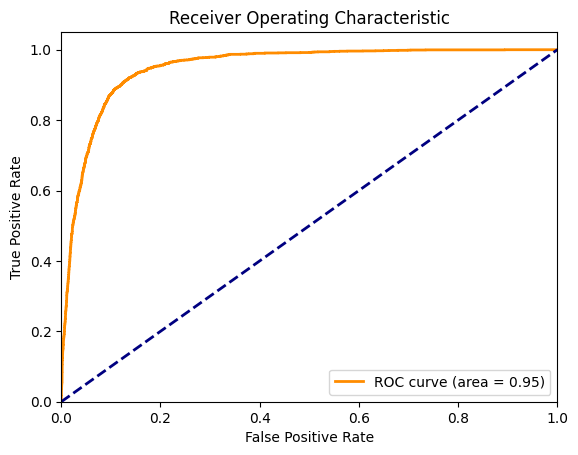

In [119]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### 5.6.2 ROC and AUC for Random Forest

In [120]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

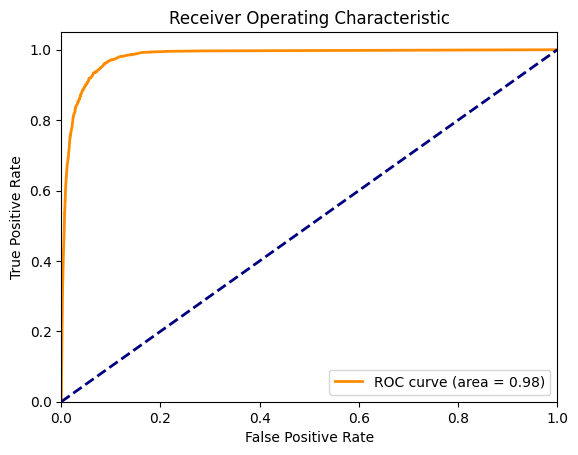

In [121]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### 5.6.3 Comparision

According to graphs above, the AUC values for Random Forest and Logistic Regression are 0.98 and 0.95, respectively. This means that the Random Forest model performs slightly better than the Logistic Regression model, since it has a higher AUC value. 

Both model show strong performance as their AUC values are significantly higher than 0.5.

The result is comply with our conclusion before.

### 5.7 Summary

- 3 predictive models have been evaluated in this notebook. The Random Forest model performs the best, while Linear Regression and Logistic Regression models have similar performances.
- Selecting the set of features in Part 1 instead of using all features has the most significant impact on the Linear Regression model (decreasing its precision and recall by 5%) and also reduces the precision of the Logistic Regression model by 4%. However, it has little impact on the Random Forest model.
- The optimum number of features that affect the results is 6. We select these features by listing all scores under different number of features sorting by importance. 
- Several optimizations have been made that improved all models:
  - A hybrid encoding was used (integer encoding for state_fips_code and county_fips_code, one-hot encoding for the rest features) was used and it imporves linear and logistic models significantly.
  - L2 regularization (Ridge) has been applied to Linear and Logistic models, improving both models by 4% on precision and recall for features selected in Part 1. 
  - The Random Forest model is improved by selecting optimum features (6), depth (9), and the number of estimators (100).
- The most significant factor in improving model performance was finding an optimized list of features. Once a good set of features was found, further improvements to the model's performance were minimal.
- All three models have accuracy higher than 0.9, indicating high data quality.